---
---

> ---
>
> #### <center>Phishing URL Detection :: Binary Classification Model</center>
>
> ---

---

#### initializing  JupyterNotebook :

In [1]:
# To display multiple output statements without using any explicit functions suchas `print() & display()`,etc...
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to include seperator(s) in between the outputs with the size of th terminal...
import shutil
_H_ = '-' * shutil.get_terminal_size().columns
_HH_ = '=' * shutil.get_terminal_size().columns

op = print

---

#### importing modules :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,roc_curve
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree

In [3]:
# configuring default attributes to the imported modules :

########

switch__theme = 1 # {0: dark theme, 1: light theme}
if(0):
    pass
elif(switch__theme == 0):
    color_hexcodes = ['#000000', '#C0C0C0', '#FFFFFF', '#EE82EE', '#6D5ACF', '#0000CD', '#00FF00', '#FFFF33', '#FFA600', '#FF0000']
    plt.style.use('dark_background')
elif(switch__theme == 1):
    color_hexcodes = ['#FFFFFF', '#808080','#000000',  '#9400D3', '#1E90FF', '#00008B', '#006400', '#FFD700', '#FF8C00', '#8B0000']
    plt.style.use('default')
else:
    pass
plt.rcParams['grid.color'] = color_hexcodes[1]
plt.rcParams['axes.prop_cycle'] = plt.cycler('color',color_hexcodes[3:])
plt.rcParams['axes.grid'] = True

########

op(_HH_)
op("log :: configured default attributes to the imported modules")
op(_HH_)

log :: configured default attributes to the imported modules


---

#### loading the `datum__phishing.csv` dataset :

In [4]:
#  Source : https://data.mendeley.com/datasets/72ptz43s9v/1
#  Reference : https://www.sciencedirect.com/science/article/pii/S2352340920313202
df__phishing = pd.read_csv('../Datum/datum__phishing.csv')
cpy__df__phishing = df__phishing.copy()
op(_HH_)
op('log :: `datum__phishing` has been successfully loaded')
op(_HH_)

log :: `datum__phishing` has been successfully loaded


In [5]:
df__phishing_wrt_url = df__phishing[['qty_dot_url','qty_hyphen_url','qty_underline_url','qty_slash_url','qty_questionmark_url','qty_equal_url','qty_at_url','qty_and_url','qty_exclamation_url','qty_space_url','qty_tilde_url','qty_comma_url','qty_plus_url','qty_asterisk_url','qty_hashtag_url','qty_dollar_url','qty_percent_url','qty_tld_url','length_url','email_in_url']]
df__phishing_wrt_domainurl = df__phishing[['qty_dot_domain','qty_hyphen_domain','qty_underline_domain','qty_slash_domain','qty_questionmark_domain','qty_equal_domain','qty_at_domain','qty_and_domain','qty_exclamation_domain','qty_space_domain','qty_tilde_domain','qty_comma_domain','qty_plus_domain','qty_asterisk_domain','qty_hashtag_domain','qty_dollar_domain','qty_percent_domain','qty_percent_domain','domain_length','domain_in_ip','server_client_domain']]
df__phishing_wrt_urldirectory = df__phishing[['qty_dot_directory','qty_hyphen_directory','qty_underline_directory','qty_slash_directory','qty_questionmark_directory','qty_equal_directory','qty_at_directory','qty_and_directory','qty_exclamation_directory','qty_space_directory','qty_tilde_directory','qty_comma_directory','qty_plus_directory','qty_asterisk_directory','qty_hashtag_directory','qty_dollar_directory','qty_percent_directory','directory_length']]
df__phishing_wrt_urlfilename = df__phishing[['qty_dot_file','qty_hyphen_file','qty_underline_file','qty_slash_file','qty_questionmark_file','qty_equal_file','qty_at_file','qty_and_file','qty_exclamation_file','qty_space_file','qty_tilde_file','qty_comma_file','qty_plus_file','qty_asterisk_file','qty_hashtag_file','qty_dollar_file','qty_percent_file','file_length']]
df__phishing_wrt_urlparameters = df__phishing[['qty_dot_params','qty_hyphen_params','qty_underline_params','qty_slash_params','qty_questionmark_params','qty_equal_params','qty_at_params','qty_and_params','qty_exclamation_params','qty_space_params','qty_tilde_params','qty_comma_params','qty_plus_params','qty_asterisk_params','qty_hashtag_params','qty_dollar_params','qty_percent_params','params_length','tld_present_params','qty_params']]
df__phishing_wrt_resolvingurl_externalservices = df__phishing[['time_response','domain_spf','asn_ip','time_domain_activation','time_domain_expiration','qty_ip_resolved','qty_nameservers','qty_mx_servers','ttl_hostname','tls_ssl_certificate','qty_redirects','url_google_index','domain_google_index','url_shortened']]

op(_HH_)
op('log :: `datum__phishing` has been categorized based on data-dictionary')
op(_HH_)

log :: `datum__phishing` has been categorized based on data-dictionary


---

#### exploring the dataset :

In [6]:
op(_HH_)
op("dimensions of `datum__phishing` :")
df__phishing.shape
op(_H_)
op("displaying the columns of `datum__phishing` :")
df__phishing.columns.to_list()
op(_H_)
op("displaying the sample of `datum__phishing` :")
df__phishing.sample(8)
op(_HH_)

dimensions of `datum__phishing` :


(88647, 112)

------------------------------------------------------------------------------------------------------------------------
displaying the columns of `datum__phishing` :


['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain',
 'domain_length',
 'domain_in_ip',
 'server_client_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_dir

------------------------------------------------------------------------------------------------------------------------
displaying the sample of `datum__phishing` :


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
65672,2,1,0,0,0,0,0,0,0,0,...,1,2,2,593,0,0,0,0,0,0
54878,2,0,0,0,0,0,0,0,0,0,...,1,3,4,3598,0,0,0,0,0,0
28485,2,0,0,0,0,0,0,0,0,0,...,-1,2,0,-1,0,-1,0,0,0,0
43078,2,0,0,0,0,0,0,0,0,0,...,1,2,2,54,1,0,0,0,0,1
77346,2,0,0,0,0,0,0,0,0,0,...,1,2,1,8915,1,1,0,0,0,0
34676,2,1,0,0,0,0,0,0,0,0,...,1,2,1,4876,0,0,0,0,0,0
67414,3,1,0,1,0,0,0,0,0,0,...,1,4,5,3588,1,0,0,0,0,1
65496,1,0,1,5,0,0,0,0,0,0,...,1,2,1,14318,1,1,0,0,0,1


In [7]:
op(_HH_)
op("displaying the statistical information of `datum__phishing` :")
df__phishing.describe()
op(_H_)
op("displaying the 'not-null count, dtypes' of `datum__phishing` :")
df__phishing.info(verbose=True,show_counts=True)
op(_H_)
op("displaying the sum of 'null-values' in `datum__phishing` :")
df__phishing.isnull().sum().sum()
op(_H_)
op("displaying the 'dtypes' of features in `datum__phishing` :")
df__phishing.dtypes
op(_H_)
op("displaying the count of 'dtypes' of features in `datum__phishing` :")
df__phishing.dtypes.value_counts()
op(_H_)
op("displaying the duplicate records in `datum__phishing` :")
df__phishing[df__phishing.duplicated()] 
op(_H_)
op("displaying the sum of duplicate records in `datum__phishing` :")
df__phishing.duplicated().sum() # may be all features of a url may be same but the url may be different so we can't drop the duplicates
op(_H_)
op('dropping the duplicate records from `datum__phishing` :')
df__phishing.drop_duplicates(inplace=True)
op(_H_)
op("displaying the dimensions of the `datum__phishing` after dropping the duplicates :")
df__phishing.shape
op(_HH_)

displaying the statistical information of `datum__phishing` :


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


--------------------------------------------------------------------------------
displaying the 'not-null count, dtypes' of `datum__phishing` :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Data columns (total 112 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    qty_dot_url                 88647 non-null  int64  
 1    qty_hyphen_url              88647 non-null  int64  
 2    qty_underline_url           88647 non-null  int64  
 3    qty_slash_url               88647 non-null  int64  
 4    qty_questionmark_url        88647 non-null  int64  
 5    qty_equal_url               88647 non-null  int64  
 6    qty_at_url                  88647 non-null  int64  
 7    qty_and_url                 88647 non-null  int64  
 8    qty_exclamation_url         88647 non-null  int64  
 9    qty_space_url               88647 non-null  int64  
 10   qty_tilde_url               88647 non-null  

0

--------------------------------------------------------------------------------
displaying the 'dtypes' of features in `datum__phishing` :


qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

--------------------------------------------------------------------------------
displaying the count of 'dtypes' of features in `datum__phishing` :


int64      111
float64      1
dtype: int64

--------------------------------------------------------------------------------
displaying the duplicate records in `datum__phishing` :


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
596,2,0,0,0,0,0,0,0,0,0,...,-1,2,0,-1,0,-1,0,0,0,0
1267,2,0,0,0,0,0,0,0,0,0,...,-1,2,0,-1,0,-1,0,0,0,0
2614,2,0,0,0,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,0
3214,3,2,0,6,1,3,0,2,0,0,...,-1,4,0,-1,0,-1,0,0,0,1
3548,2,0,1,2,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88363,2,0,0,0,0,0,0,0,0,0,...,-1,2,1,-1,0,-1,0,0,0,0
88365,2,0,0,0,0,0,0,0,0,0,...,-1,0,0,-1,0,-1,-1,-1,0,0
88387,2,1,0,6,1,3,0,2,0,0,...,-1,4,0,-1,0,-1,0,0,0,1
88405,2,0,0,0,0,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,0


--------------------------------------------------------------------------------
displaying the sum of duplicate records in `datum__phishing` :


1438

--------------------------------------------------------------------------------
dropping the duplicate records from `datum__phishing` :
--------------------------------------------------------------------------------
displaying the dimensions of the `datum__phishing` after dropping the duplicates :


(87209, 112)

---

#### evaluating & evoluting the dataset :

In [7]:
##### manipulating the `dtypes` of the dataset based on data-dictionary :

df__phishing_bool = df__phishing[['email_in_url','domain_in_ip','server_client_domain','tld_present_params','domain_spf','tls_ssl_certificate','url_google_index','domain_google_index','url_shortened','phishing']].astype('bool')
df__phishing_int = df__phishing.drop(df__phishing_bool.columns,axis=1)
df__phishing = pd.concat([df__phishing_int,df__phishing_bool],axis=1)

op(_HH_)
op("displaying the count of 'dtypes' of features in `datum__phishing` after data-manipulation :")
df__phishing.dtypes.value_counts()
op(_HH_)

displaying the count of 'dtypes' of features in `datum__phishing` after data-manipulation :


int64      101
bool        10
float64      1
dtype: int64

In [8]:
#### assignment of the target variable :
attr__phishing = df__phishing['phishing']
df__phishing.drop(['phishing'],axis=1,inplace=True)

op(_HH_)
op('displaying the dimensions of `df__phishing` after dropping the target attribute from the dataset : ')
df__phishing.shape
op(_HH_)

displaying the dimensions of `df__phishing` after dropping the target attribute from the dataset : 


(88647, 111)

In [9]:
# boolean attributes
fs__skb_chi2 = SelectKBest(chi2,k='all')
fs__skb_chi2.fit_transform(df__phishing_bool.iloc[:,:-1], attr__phishing)

df__fs_bool = pd.DataFrame({'p_values' : fs__skb_chi2.pvalues_,'scores : chi2_values' : fs__skb_chi2.scores_,'features' : fs__skb_chi2.get_feature_names_out(),'support' : fs__skb_chi2.get_support()})
df__fs_bool.sort_values(by=['p_values','scores : chi2_values'],ascending=True,inplace=True)
dct__fs_bool = df__fs_bool.to_dict(orient='index')


op(_HH_)
op("displaying the boolean features with their chi2 scores and p-values :")
df__fs_bool
op(_H_)
op("dimensions of the boolean features dataframe :")
df__fs_bool.shape
op(_HH_)
df__fs_bool = df__fs_bool[np.logical_and(df__fs_bool['p_values'] <= 0.05,df__fs_bool['p_values'] >= 0.00)]
dct__fs_bool = df__fs_bool.to_dict(orient='index')
op(_HH_)
op("displaying the selected boolean features based on p_values in range [0.00,0.05] :")
df__fs_bool
op(_H_)
op("dimensions of the selected boolean features dataframe :")
df__fs_bool.shape
op(_HH_)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

displaying the boolean features with their chi2 scores and p-values :


,p_values,scores : chi2_values,features,support
4,0.000000e+00,1966.264481,domain_spf,True
0,0.000000e+00,3069.559480,email_in_url,True
8,7.140899e-191,868.435256,url_shortened,True
3,1.098722e-89,403.215866,tld_present_params,True
1,6.752435e-67,298.569368,domain_in_ip,True
6,2.793898e-24,103.360501,url_google_index,True
5,3.397467e-14,57.489741,tls_ssl_certificate,True
7,5.602346e-11,42.954654,domain_google_index,True
2,3.963337e-01,0.719421,server_client_domain,True


------------------------------------------------------------------------------------------------------------------------
dimensions of the boolean features dataframe :


(9, 4)

displaying the selected boolean features based on p_values in range [0.00,0.05] :


,p_values,scores : chi2_values,features,support
4,0.000000e+00,1966.264481,domain_spf,True
0,0.000000e+00,3069.559480,email_in_url,True
8,7.140899e-191,868.435256,url_shortened,True
3,1.098722e-89,403.215866,tld_present_params,True
1,6.752435e-67,298.569368,domain_in_ip,True
6,2.793898e-24,103.360501,url_google_index,True
5,3.397467e-14,57.489741,tls_ssl_certificate,True
7,5.602346e-11,42.954654,domain_google_index,True


------------------------------------------------------------------------------------------------------------------------
dimensions of the selected boolean features dataframe :


(8, 4)

In [10]:
op(_HH_)
op('displaying the selected features from `Boolean` dtypes which are in range [0.00,0.05] :')
df__fs_bool[np.logical_and(df__fs_bool['p_values'] <= 0.05,df__fs_bool['p_values'] >= 0.00)]
op(_H_)
op('displaying the selected features from `Boolean` dtypes which are >= `mean` :')
df__fs_bool[df__fs_bool['scores : chi2_values'] >= np.mean(df__fs_bool['scores : chi2_values'])]
op(_HH_)

displaying the selected features from `Boolean` dtypes which are in range [0.00,0.05] :


,p_values,scores : chi2_values,features,support
4,0.000000e+00,1966.264481,domain_spf,True
0,0.000000e+00,3069.559480,email_in_url,True
8,7.140899e-191,868.435256,url_shortened,True
3,1.098722e-89,403.215866,tld_present_params,True
1,6.752435e-67,298.569368,domain_in_ip,True
6,2.793898e-24,103.360501,url_google_index,True
5,3.397467e-14,57.489741,tls_ssl_certificate,True
7,5.602346e-11,42.954654,domain_google_index,True


------------------------------------------------------------------------------------------------------------------------
displaying the selected features from `Boolean` dtypes which are >= `mean` :


,p_values,scores : chi2_values,features,support
4,0.000000e+00,1966.264481,domain_spf,True
0,0.000000e+00,3069.559480,email_in_url,True
8,7.140899e-191,868.435256,url_shortened,True


In [11]:
# numerical attributes
fs__mic = mutual_info_classif(df__phishing_int, attr__phishing,random_state=0)

df__fs_num = pd.DataFrame({'features' : df__phishing_int.columns.to_list(), 'relation w.r.t `y` i.e. `phishing`' : fs__mic.tolist()})
df__fs_num.sort_values(by=['relation w.r.t `y` i.e. `phishing`'],ascending=False,inplace=True)
dct__fs_int = df__fs_num.to_dict(orient='index')

op(_HH_)
op('Sample of the numeric features from the dataset :')
df__fs_num.sample(8)
op(_H_)
op('mean of the `relation w.r.t `y` i.e. `phishing` :')
np.mean(df__fs_num['relation w.r.t `y` i.e. `phishing`'])
op(_HH_)

df__fs_num = df__fs_num[df__fs_num['relation w.r.t `y` i.e. `phishing`'] >= np.mean(df__fs_num['relation w.r.t `y` i.e. `phishing`'])]
dct__fs_num = df__fs_num.to_dict(orient='index')
op(_HH_)
op('Dimension of the dataset after feature selection :')
df__fs_num.shape
op(_HH_)

Sample of the numeric features from the dataset :


,features,relation w.r.t `y` i.e. `phishing`
91,params_length,0.067787
99,qty_mx_servers,0.015764
18,length_url,0.280809
75,qty_hyphen_params,0.075211
84,qty_tilde_params,0.073630
0,qty_dot_url,0.062207
79,qty_equal_params,0.072374
33,qty_hashtag_domain,0.001290


------------------------------------------------------------------------------------------------------------------------
mean of the `relation w.r.t `y` i.e. `phishing` :


0.1505445524271958

Dimension of the dataset after feature selection :


(40, 2)

In [12]:
df__phishing_fs = df__phishing[df__fs_num['features'].tolist() + df__fs_bool['features'].tolist()]

op(_HH_)
op('displaying the dimensions of the dataset after feature selection :')
df__phishing_fs.shape
op(_H_)
op('displaying the features/columns of the dataset after feature selection :')
df__phishing_fs.columns.to_list()
op(_HH_)

displaying the dimensions of the dataset after feature selection :


(88647, 48)

------------------------------------------------------------------------------------------------------------------------
displaying the features/columns of the dataset after feature selection :


['directory_length',
 'qty_slash_directory',
 'qty_slash_url',
 'qty_dot_directory',
 'qty_dot_file',
 'file_length',
 'qty_hyphen_directory',
 'qty_tilde_file',
 'qty_percent_directory',
 'qty_underline_directory',
 'qty_at_directory',
 'qty_equal_file',
 'qty_hyphen_file',
 'qty_and_directory',
 'qty_percent_file',
 'qty_underline_file',
 'qty_slash_file',
 'qty_dollar_directory',
 'qty_equal_directory',
 'qty_asterisk_file',
 'qty_and_file',
 'qty_comma_file',
 'qty_asterisk_directory',
 'qty_hashtag_file',
 'qty_questionmark_file',
 'qty_comma_directory',
 'qty_questionmark_directory',
 'qty_plus_file',
 'qty_plus_directory',
 'qty_tilde_directory',
 'qty_space_directory',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_at_file',
 'qty_space_file',
 'qty_dollar_file',
 'qty_hashtag_directory',
 'length_url',
 'time_domain_activation',
 'asn_ip',
 'domain_spf',
 'email_in_url',
 'url_shortened',
 'tld_present_params',
 'domain_in_ip',
 'url_google_index',
 'tls_ssl_cert

plotting the correlation of dependent variable (`phishing`) w.r.t to independent variables (except `phishing`) of the dataset before feature selection :
#------------------------------------------------------------------------------------------------------------------------#


<AxesSubplot:title={'center':'correlation of features w.r.t `phishing`'}>

([<matplotlib.axis.XTick at 0x23281bb0e50>,
 [Text(0, 0, 'qty_dot_url'),
  Text(1, 0, 'qty_hyphen_url'),
  Text(2, 0, 'qty_underline_url'),
  Text(3, 0, 'qty_slash_url'),
  Text(4, 0, 'qty_questionmark_url'),
  Text(5, 0, 'qty_equal_url'),
  Text(6, 0, 'qty_at_url'),
  Text(7, 0, 'qty_and_url'),
  Text(8, 0, 'qty_exclamation_url'),
  Text(9, 0, 'qty_space_url'),
  Text(10, 0, 'qty_tilde_url'),
  Text(11, 0, 'qty_comma_url'),
  Text(12, 0, 'qty_plus_url'),
  Text(13, 0, 'qty_asterisk_url'),
  Text(14, 0, 'qty_hashtag_url'),
  Text(15, 0, 'qty_dollar_url'),
  Text(16, 0, 'qty_percent_url'),
  Text(17, 0, 'qty_tld_url'),
  Text(18, 0, 'length_url'),
  Text(19, 0, 'qty_dot_domain'),
  Text(20, 0, 'qty_hyphen_domain'),
  Text(21, 0, 'qty_underline_domain'),
  Text(22, 0, 'qty_slash_domain'),
  Text(23, 0, 'qty_questionmark_domain'),
  Text(24, 0, 'qty_equal_domain'),
  Text(25, 0, 'qty_at_domain'),
  Text(26, 0, 'qty_and_domain'),
  Text(27, 0, 'qty_exclamation_domain'),
  Text(28, 0, 'qty_

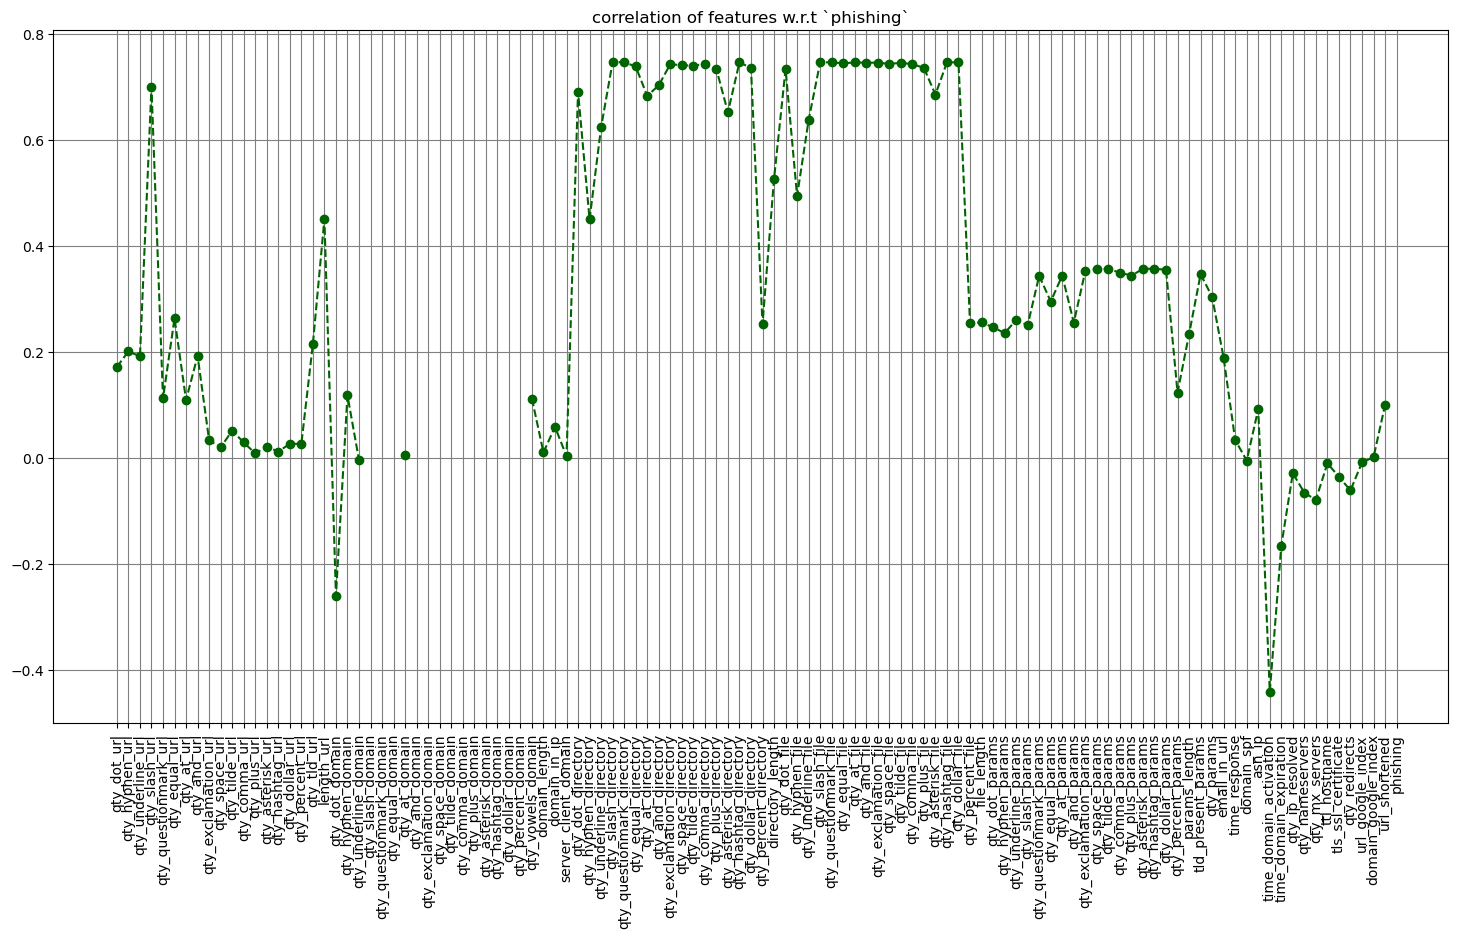

In [13]:
op(_HH_)
op('plotting the correlation of dependent variable (`phishing`) w.r.t to independent variables (except `phishing`) of the dataset before feature selection :')
op('#'+_H_+'#')
(cpy__df__phishing.corr().iloc[:-1, -1]).plot(figsize=(18,9),color=color_hexcodes[6],title='correlation of features w.r.t `phishing`',rot=90,marker='o',linestyle='--')
plt.xticks(range(len(cpy__df__phishing.columns)), cpy__df__phishing.columns)
op(_HH_)

plotting the correlation of dependent variable (`phishing`) w.r.t to independent variables (except `phishing`) of the dataset after feature selection :
#------------------------------------------------------------------------------------------------------------------------#


<AxesSubplot:title={'center':'correlation of selected features w.r.t `phishing`'}>

([<matplotlib.axis.XTick at 0x23282f38550>,
 [Text(0, 0, 'directory_length'),
  Text(1, 0, 'qty_slash_directory'),
  Text(2, 0, 'qty_slash_url'),
  Text(3, 0, 'qty_dot_directory'),
  Text(4, 0, 'qty_dot_file'),
  Text(5, 0, 'file_length'),
  Text(6, 0, 'qty_hyphen_directory'),
  Text(7, 0, 'qty_tilde_file'),
  Text(8, 0, 'qty_percent_directory'),
  Text(9, 0, 'qty_underline_directory'),
  Text(10, 0, 'qty_at_directory'),
  Text(11, 0, 'qty_equal_file'),
  Text(12, 0, 'qty_hyphen_file'),
  Text(13, 0, 'qty_and_directory'),
  Text(14, 0, 'qty_percent_file'),
  Text(15, 0, 'qty_underline_file'),
  Text(16, 0, 'qty_slash_file'),
  Text(17, 0, 'qty_dollar_directory'),
  Text(18, 0, 'qty_equal_directory'),
  Text(19, 0, 'qty_asterisk_file'),
  Text(20, 0, 'qty_and_file'),
  Text(21, 0, 'qty_comma_file'),
  Text(22, 0, 'qty_asterisk_directory'),
  Text(23, 0, 'qty_hashtag_file'),
  Text(24, 0, 'qty_questionmark_file'),
  Text(25, 0, 'qty_comma_directory'),
  Text(26, 0, 'qty_questionmark_dire

([<matplotlib.axis.YTick at 0x23282f386d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

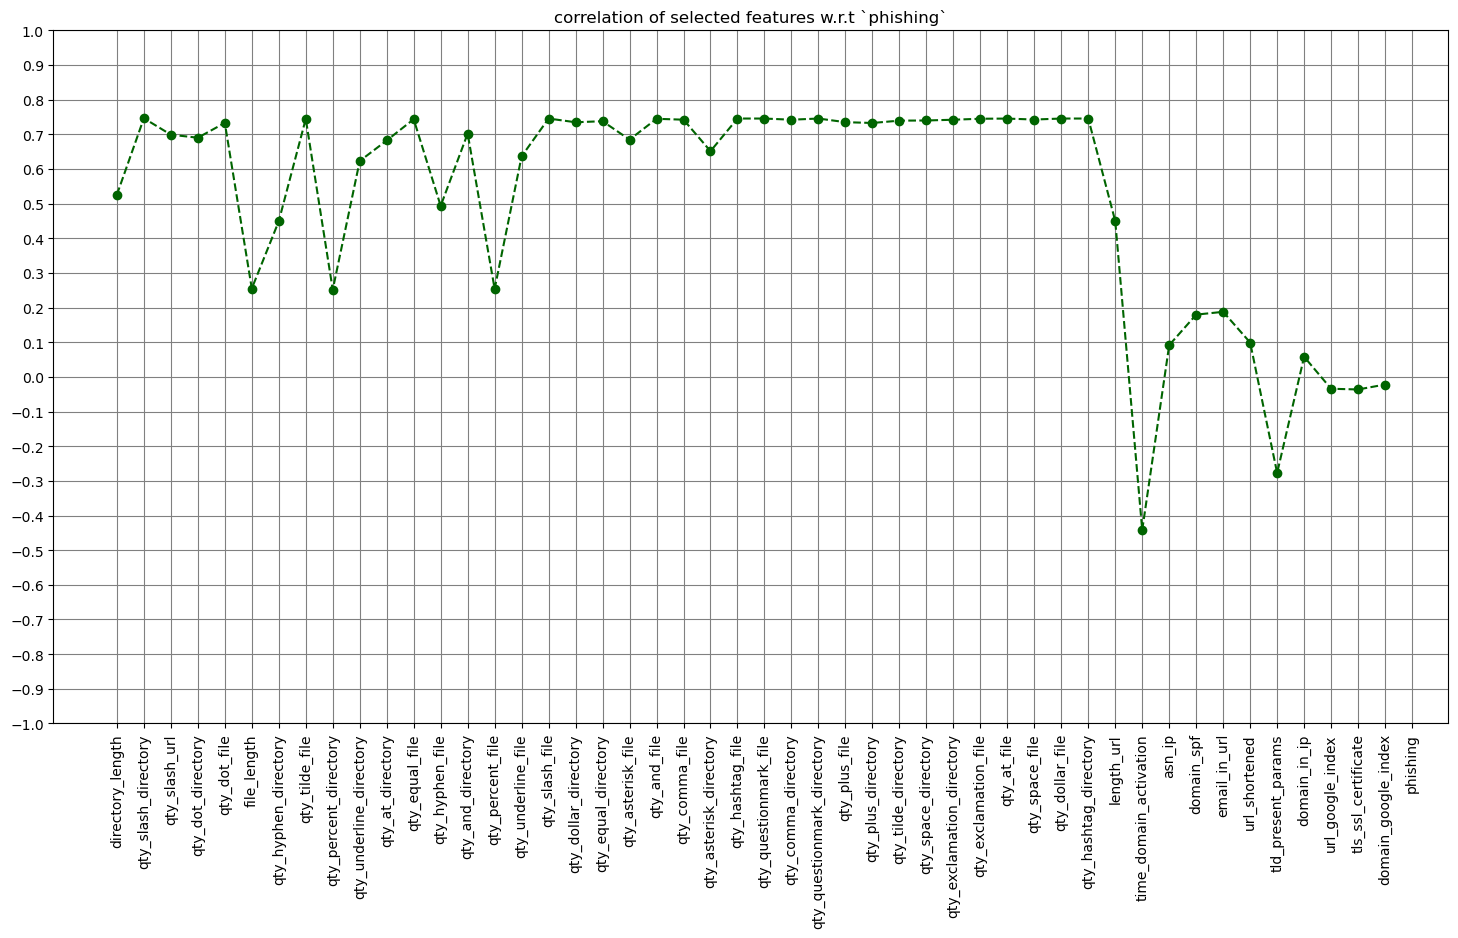

In [14]:
cpy__df__phishing_fs = pd.concat([df__phishing_fs,attr__phishing],axis=1)

op(_HH_)
op('plotting the correlation of dependent variable (`phishing`) w.r.t to independent variables (except `phishing`) of the dataset after feature selection :')
op('#'+_H_+'#')
(cpy__df__phishing_fs.corr().iloc[:-1, -1]).plot(figsize=(18,9),color=color_hexcodes[6],title='correlation of selected features w.r.t `phishing`',rot=90,marker='o',linestyle='--')
plt.xticks(range(len(cpy__df__phishing_fs.columns)), cpy__df__phishing_fs.columns)
plt.yticks(np.arange(-1.0,1.1,0.1))
# plt.axhline(-0.5, color_hexcodes[1], linestyle='--')
# plt.axhline(0.0, color_hexcodes[2], linestyle='--')
# plt.axhline(0.5, color_hexcodes[1], linestyle='--')
op(_HH_)

plottiing the correlation  of the dataset after feature selection for numerical & boolean datasets :
#------------------------------------------------------------------------------------------------------------------------#


<AxesSubplot:title={'center':"relation w.r.t 'boolean features'"}, ylabel='features'>

<AxesSubplot:title={'center':"relation w.r.t 'numerical features'"}, ylabel='features'>

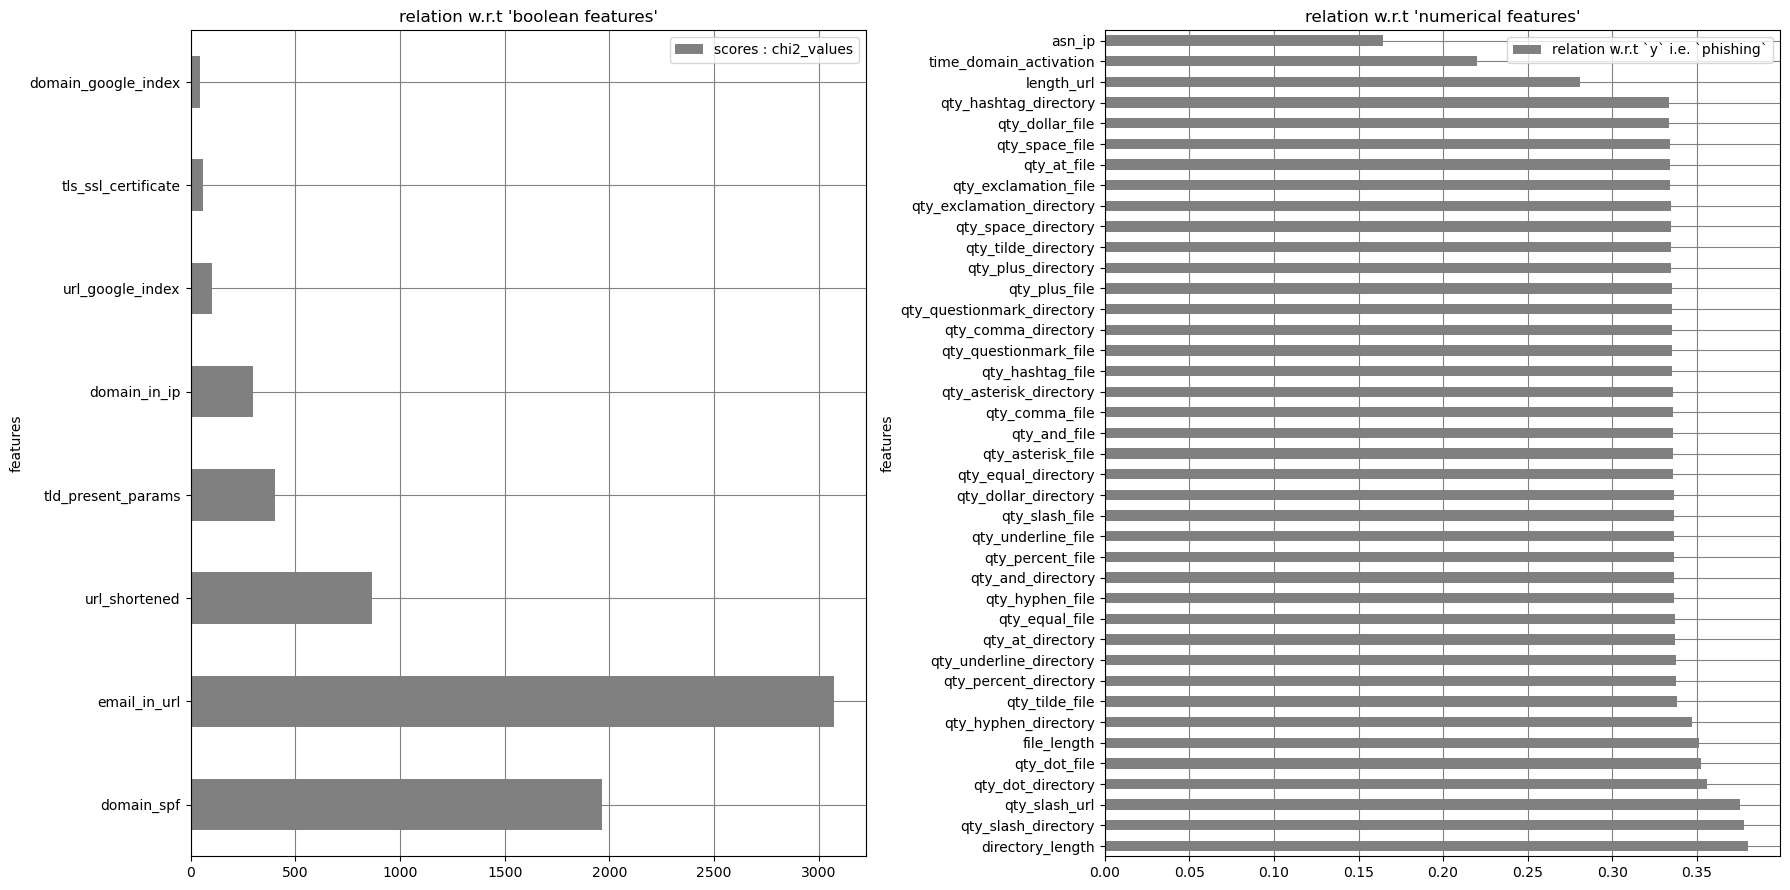

In [15]:
op(_HH_)
op('plottiing the correlation  of the dataset after feature selection for numerical & boolean datasets :')
op('#'+_H_+'#')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,9))
df__fs_bool.plot(kind='barh',x='features',y='scores : chi2_values',rot=0,fig=fig,ax=ax1,title="relation w.r.t 'boolean features'",color=color_hexcodes[1])
df__fs_num.plot(kind='barh',x='features',y='relation w.r.t `y` i.e. `phishing`',rot=0,fig=fig,ax=ax2,title="relation w.r.t 'numerical features'",color=color_hexcodes[1])
plt.tight_layout()
plt.show()
op(_HH_)

In [16]:
op(_HH_)
op('displaying number of features selected from each categorized  dataset :')
op('#'+_H_+'#')
f'number of features selected from `df__phishing_wtr_url` : {len(set(df__phishing_fs.columns.to_list()).intersection(set(df__phishing_wrt_url.columns.to_list())))}'
op(_H_)
f'number of features selected from `df__phishing_wtr_domainurl` : {len(set(df__phishing_fs.columns.to_list()).intersection(set(df__phishing_wrt_domainurl.columns.to_list())))}'
op(_H_)
f'number of features selected from `df__phishing_wtr_urldirectory` : {len(set(df__phishing_fs.columns.to_list()).intersection(set(df__phishing_wrt_urldirectory.columns.to_list())))}'
op(_H_)
f'number of features selected from `df__phishing_wrt_urlfilename` : {len(set(df__phishing_fs.columns.to_list()).intersection(set(df__phishing_wrt_urlfilename.columns.to_list())))}'
op(_H_)
f'number of features selected from `df__phishing_wrt_urlparameters` : {len(set(df__phishing_fs.columns.to_list()).intersection(set(df__phishing_wrt_urlparameters.columns.to_list())))}'
op(_H_)
f'number of features selected from `df__phishing_wrt_resolvingurl_externalservices` : {len(set(df__phishing_fs.columns.to_list()).intersection(set(df__phishing_wrt_resolvingurl_externalservices.columns.to_list())))}'
op(_HH_)

displaying number of features selected from each categorized  dataset :
#------------------------------------------------------------------------------------------------------------------------#


'number of features selected from `df__phishing_wtr_url` : 3'

------------------------------------------------------------------------------------------------------------------------


'number of features selected from `df__phishing_wtr_domainurl` : 1'

------------------------------------------------------------------------------------------------------------------------


'number of features selected from `df__phishing_wtr_urldirectory` : 18'

------------------------------------------------------------------------------------------------------------------------


'number of features selected from `df__phishing_wrt_urlfilename` : 18'

------------------------------------------------------------------------------------------------------------------------


'number of features selected from `df__phishing_wrt_urlparameters` : 1'

------------------------------------------------------------------------------------------------------------------------


'number of features selected from `df__phishing_wrt_resolvingurl_externalservices` : 7'

In [17]:
model__ip__argparams = {}
for itr in df__phishing_fs.select_dtypes(exclude='bool').columns.to_list():
    if(0):
        pass
    elif(itr in df__phishing_wrt_resolvingurl_externalservices.columns.to_list()):
        model__ip__argparams[itr] = df__phishing_wrt_resolvingurl_externalservices[itr].mean()
    elif(itr not in df__phishing_wrt_resolvingurl_externalservices.columns.to_list()):
        model__ip__argparams[itr] = None
    else:
        pass
for itr in df__phishing_fs.select_dtypes(include='bool').columns.to_list():
    model__ip__argparams[itr] = df__phishing_fs[itr].mode().tolist()[0]


with open('../Datum/model__ip__argparams.pkl','wb') as f:
    pkl.dump(model__ip__argparams,f)

op(_HH_)
op("log :: 'datum parameters' have been successfully dumped into `../Datum/model__ip__argparams.pkl`")
op(_HH_)

log :: 'datum parameters' have been successfully dumped into `../Datum/model__ip__argparams.pkl`


----

#### evoluting & evaluating the model :

#####  :: configuring 'train_test_split' :

In [18]:
def func__tts(args__df,args__attr):
    return(train_test_split(args__df,args__attr,test_size=0.5,random_state=0))

#####  :: initializing 'model(s)' :

In [20]:
def func__mNB():
    return(BernoulliNB())

def func__mNB_attrs(args__mNB : BernoulliNB):
    return(
        args__mNB.class_count_,
        args__mNB.class_log_prior_,
        args__mNB.classes_,
        args__mNB.feature_count_,
        args__mNB.feature_log_prob_,
        args__mNB.n_features_in_,
        args__mNB.feature_names_in_
    )

def func__mNB_mthds(args__mNB : BernoulliNB,args__x_train,args__y_train,args__x_test,args__y_test):
    return(
        args__mNB.fit(args__x_train,args__y_train),

        # train-validation :
        args__mNB.predict(args__x_train),
        args__mNB.predict_joint_log_proba(args__x_train),
        args__mNB.predict_log_proba(args__x_train),
        args__mNB.predict_proba(args__x_train),
        args__mNB.score(args__x_train,args__y_train),
        # test :
        args__mNB.predict(args__x_test),
        args__mNB.predict_joint_log_proba(args__x_test),
        args__mNB.predict_log_proba(args__x_test),
        args__mNB.predict_proba(args__x_test),
        args__mNB.score(args__x_test,args__y_test),


        args__mNB.get_params()
    )


In [21]:
def func__mLR():
    return(LogisticRegression(max_iter=111,random_state=0))

def func__mLR_attrs(args__mLR : LogisticRegression):
    return(
        args__mLR.classes_,
        args__mLR.coef_,
        args__mLR.intercept_,
        args__mLR.n_features_in_,
        args__mLR.feature_names_in_,
        args__mLR.n_iter_
    )

def func__mLR_mthds(args__mLR : LogisticRegression,args__x_train,args__y_train,args__x_test,args__y_test):
    return(
        args__mLR.fit(args__x_train,args__y_train),
        
        # train-validation :
        args__mLR.predict(args__x_train),
        args__mLR.decision_function(args__x_train),
        args__mLR.predict_log_proba(args__x_train),
        args__mLR.predict_proba(args__x_train),
        args__mLR.score(args__x_train,args__y_train),
        # test :
        args__mLR.predict(args__x_test),
        args__mLR.decision_function(args__x_test),
        args__mLR.predict_log_proba(args__x_test),
        args__mLR.predict_proba(args__x_test),
        args__mLR.score(args__x_test,args__y_test),


        args__mLR.get_params(),
        args__mLR.densify(),
        args__mLR.sparsify()
    )


In [22]:
def func__mDC():
    return(DecisionTreeClassifier(random_state=0))

def func__mDC_attrs(args__mDC : DecisionTreeClassifier):
    return(
        args__mDC.classes_,
        args__mDC.feature_importances_,
        args__mDC.max_features_,
        args__mDC.n_classes_,
        args__mDC.n_features_in_,
        args__mDC.feature_names_in_,
        args__mDC.n_outputs_,
        args__mDC.tree_
    )

def func__mDC_mthds(args__mDC : DecisionTreeClassifier,args__x_train,args__y_train,args__x_test,args__y_test):
    return(
        args__mDC.fit(args__x_train,args__y_train),

        # train-validation :
        args__mDC.predict(args__x_train),
        args__mDC.apply(args__x_train),
        args__mDC.cost_complexity_pruning_path(args__x_train,args__y_train),
        args__mDC.decision_path(args__x_train),
        args__mDC.predict_proba(args__x_train),
        args__mDC.predict_log_proba(args__x_train),
        args__mDC.score(args__x_train,args__y_train),
        # test :
        args__mDC.predict(args__x_test),
        args__mDC.apply(args__x_test),
        args__mDC.cost_complexity_pruning_path(args__x_test,args__y_test),
        args__mDC.decision_path(args__x_test),
        args__mDC.predict_proba(args__x_test),
        args__mDC.predict_log_proba(args__x_test),
        args__mDC.score(args__x_test,args__y_test),

        args__mDC.get_params(),
        args__mDC.get_depth(),
        args__mDC.get_n_leaves()
    )


In [23]:
def func__mRFC():
    return(RandomForestClassifier(random_state=0))

def func__mRFC_attrs(args__mRFC : RandomForestClassifier):
    return(
        args__mRFC.estimator_,
        # args__mRFC.base_estimator_, # DeprecatedWarning
        args__mRFC.estimators_,
        args__mRFC.classes_,
        args__mRFC.n_classes_,
        args__mRFC.n_features_in_,
        args__mRFC.feature_names_in_,
        args__mRFC.n_outputs_,
        args__mRFC.feature_importances_,
        # args__mRFC.oob_score_, # AttributeError
        # args__mRFC.oob_decision_function_ # AttributeError
    )

def func__mRFC_mthds(args__mRFC : RandomForestClassifier,args__x_train,args__y_train,args__x_test,args__y_test):
    return(
        args__mRFC.fit(args__x_train,args__y_train),

        # train-validation :
        args__mRFC.predict(args__x_train),
        args__mRFC.apply(args__x_train),
        args__mRFC.decision_path(args__x_train),
        args__mRFC.predict_proba(args__x_train),
        args__mRFC.predict_log_proba(args__x_train),
        args__mRFC.score(args__x_train,args__y_train),
        # test :
        args__mRFC.predict(args__x_test),
        args__mRFC.apply(args__x_test),
        args__mRFC.decision_path(args__x_test),
        args__mRFC.predict_proba(args__x_test),
        args__mRFC.predict_log_proba(args__x_test),
        args__mRFC.score(args__x_test,args__y_test),


        args__mRFC.get_params()
    )


In [24]:
def func__mKNN():
    return(KNN())

def func__mKNN_attrs(args__mKNN : KNN):
    return(
        args__mKNN.classes_,
        args__mKNN.effective_metric_,
        args__mKNN.effective_metric_params_,
        args__mKNN.n_features_in_,
        args__mKNN.feature_names_in_,
        args__mKNN.n_samples_fit_,
        args__mKNN.outputs_2d_
    )

def func__mKNN_mthds(args__mKNN : KNN,args__x_train,args__y_train,args__x_test,args__y_test):
    return(
        args__mKNN.fit(args__x_train,args__y_train),

        # train-validation :
        args__mKNN.predict(args__x_train),
        args__mKNN.kneighbors(args__x_train),
        args__mKNN.kneighbors_graph(args__x_train),
        args__mKNN.predict_proba(args__x_train),
        args__mKNN.score(args__x_train,args__y_train),
        # test :
        args__mKNN.predict(args__x_test),
        args__mKNN.kneighbors(args__x_test),
        args__mKNN.kneighbors_graph(args__x_test),
        args__mKNN.predict_proba(args__x_test),
        args__mKNN.score(args__x_test,args__y_test),


        args__mKNN.get_params()
    )


In [25]:
def func__mSVM():
    return(SVC(random_state=0))

def func__mSVM_attrs(args__mSVM : SVC):
    return(
        # args__mSVM.class_weight_,
        # args__mSVM.classes_,
        # args__mSVM.coef_,
        # args__mSVM.dual_coef_,
        # args__mSVM.fit_status_,
        # args__mSVM.intercept_,
        # args__mSVM.n_features_in_,
        # args__mSVM.feature_names_in_,
        # args__mSVM.n_iter_,
        # args__mSVM.support_,
        # args__mSVM.support_vectors_,
        # args__mSVM.n_support_,
        # args__mSVM.probA_,
        # args__mSVM.probB_,
        # args__mSVM.shape_fit_
    )

def func__mSVM_mthds(args__mSVM : SVC,args__x_train,args__y_train,args__x_test,args__y_test):
    return(
        args__mSVM.fit(args__x_train,args__y_train),
        

        # train-validation :
        args__mSVM.predict(args__x_train),
        # args__mSVM.decision_function(args__x_train),
        # args__mSVM.predict_proba(args__x_train),
        # args__mSVM.predict_log_proba(args__x_train),
        args__mSVM.score(args__x_train,args__y_train),
        # test :
        args__mSVM.predict(args__x_test),
        # args__mSVM.decision_function(args__x_train),
        # args__mSVM.predict_proba(args__x_test),
        # args__mSVM.predict_log_proba(args__x_test),
        args__mSVM.score(args__x_test,args__y_test),


        # args__mSVM.get_params()
    )


##### :: configuring model metrics:

In [26]:
def func__model_metrics(args__op,args__y_train=None,args__y_tv_pred=None,args__y_test=None,args__y_t_pred=None):
    if(0):
        pass
    # train-validation :
    elif(args__op == 'tv'):
        return(
            confusion_matrix(args__y_train,args__y_tv_pred),
            accuracy_score(args__y_train,args__y_tv_pred),
            precision_score(args__y_train,args__y_tv_pred),
            recall_score(args__y_train,args__y_tv_pred),
            f1_score(args__y_train,args__y_tv_pred),
            roc_auc_score(args__y_train,args__y_tv_pred)
        )
    # test :
    elif(args__op == 't'):
        return(
            confusion_matrix(args__y_test,args__y_t_pred),
            accuracy_score(args__y_test,args__y_t_pred),
            precision_score(args__y_test,args__y_t_pred),
            recall_score(args__y_test,args__y_t_pred),
            f1_score(args__y_test,args__y_t_pred),
            roc_auc_score(args__y_test,args__y_t_pred)
        )
    else:
        pass

##### :: model(s) evolution without feature selection :

In [27]:
nfs_m__x_train,nfs_m__x_test,nfs_m__y_train,nfs_m__y_test = func__tts(df__phishing,attr__phishing)

op(_HH_)
op("log :: sucessfully the datasets has splitted into train and test datasets")
op(_HH_)

op(_HH_)
op("displaying the dimensions of `nfs_m__x_train`, `nfs_m__x_test`, `nfs_m__y_train`, `nfs_m__y_test` ::")
nfs_m__x_train.shape
nfs_m__x_test.shape
nfs_m__y_train.shape
nfs_m__y_test.shape
op(_HH_)

log :: sucessfully the datasets has splitted into train and test datasets
displaying the dimensions of `nfs_m__x_train`, `nfs_m__x_test`, `nfs_m__y_train`, `nfs_m__y_test` ::


(43604, 111)

(43605, 111)

(43604,)

(43605,)

In [28]:
nfs_model__NB = func__mNB()
nfs_model__NB_mthds = func__mNB_mthds(nfs_model__NB,nfs_m__x_train,nfs_m__y_train,nfs_m__x_test,nfs_m__y_test)
nfs_model__NB_attrs = func__mNB_attrs(nfs_model__NB)
nfs__model_NB_mtrx_tv = func__model_metrics(args__op='tv',args__y_train=nfs_m__y_train,args__y_tv_pred=nfs_model__NB_mthds[1])
nfs__model_NB_mtrx_t = func__model_metrics(args__op='t',args__y_test=nfs_m__y_test,args__y_t_pred=nfs_model__NB_mthds[6])

# tnr,fpr,fnr,tpr :
nfs__model_NB_mtrx_tv_cm_tn,nfs__model_NB_mtrx_tv_cm_fp,nfs__model_NB_mtrx_tv_cm_fn,nfs__model_NB_mtrx_tv_cm_tp = nfs__model_NB_mtrx_tv[0].ravel()
nfs__model_NB_mtrx_tv_cm_tnr = (nfs__model_NB_mtrx_tv_cm_tn/(nfs__model_NB_mtrx_tv_cm_tn+nfs__model_NB_mtrx_tv_cm_fp)).round(4)
nfs__model_NB_mtrx_tv_cm_fpr = (nfs__model_NB_mtrx_tv_cm_fp/(nfs__model_NB_mtrx_tv_cm_tn+nfs__model_NB_mtrx_tv_cm_fp)).round(4)
nfs__model_NB_mtrx_tv_cm_fnr = (nfs__model_NB_mtrx_tv_cm_fn/(nfs__model_NB_mtrx_tv_cm_fn+nfs__model_NB_mtrx_tv_cm_tp)).round(4)
nfs__model_NB_mtrx_tv_cm_tpr = (nfs__model_NB_mtrx_tv_cm_tp/(nfs__model_NB_mtrx_tv_cm_fn+nfs__model_NB_mtrx_tv_cm_tp)).round(4)
lst__nfs__model_NB_mtrx_tv_cmr = [nfs__model_NB_mtrx_tv_cm_tnr,nfs__model_NB_mtrx_tv_cm_fpr,nfs__model_NB_mtrx_tv_cm_fnr,nfs__model_NB_mtrx_tv_cm_tpr]
nfs__model_NB_mtrx_tv = list(nfs__model_NB_mtrx_tv)
nfs__model_NB_mtrx_tv.insert(1,lst__nfs__model_NB_mtrx_tv_cmr)
nfs__model_NB_mtrx_tv = tuple(nfs__model_NB_mtrx_tv)


nfs__model_NB_mtrx_t_cm_tn,nfs__model_NB_mtrx_t_cm_fp,nfs__model_NB_mtrx_t_cm_fn,nfs__model_NB_mtrx_t_cm_tp = nfs__model_NB_mtrx_t[0].ravel()
nfs__model_NB_mtrx_t_cm_tnr = (nfs__model_NB_mtrx_t_cm_tn/(nfs__model_NB_mtrx_t_cm_tn+nfs__model_NB_mtrx_t_cm_fp)).round(4)
nfs__model_NB_mtrx_t_cm_fpr = (nfs__model_NB_mtrx_t_cm_fp/(nfs__model_NB_mtrx_t_cm_tn+nfs__model_NB_mtrx_t_cm_fp)).round(4)
nfs__model_NB_mtrx_t_cm_fnr = (nfs__model_NB_mtrx_t_cm_fn/(nfs__model_NB_mtrx_t_cm_fn+nfs__model_NB_mtrx_t_cm_tp)).round(4)
nfs__model_NB_mtrx_t_cm_tpr = (nfs__model_NB_mtrx_t_cm_tp/(nfs__model_NB_mtrx_t_cm_fn+nfs__model_NB_mtrx_t_cm_tp)).round(4)
lst__nfs__model_NB_mtrx_t_cmr = [nfs__model_NB_mtrx_t_cm_tnr,nfs__model_NB_mtrx_t_cm_fpr,nfs__model_NB_mtrx_t_cm_fnr,nfs__model_NB_mtrx_t_cm_tpr]
nfs__model_NB_mtrx_t = list(nfs__model_NB_mtrx_t)
nfs__model_NB_mtrx_t.insert(1,lst__nfs__model_NB_mtrx_t_cmr)
nfs__model_NB_mtrx_t = tuple(nfs__model_NB_mtrx_t)

op(_HH_)
op("log :: `nfs_model__NB` has been successfully 'trained , validated and tested' on the data-set")
op(_HH_)

with open('../Datum/nfs_model__NB.txt','w') as f:
    f.write(_HH_)
    f.write(str(nfs_model__NB_mthds))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(nfs_model__NB_attrs))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(nfs__model_NB_mtrx_tv))
    f.write('\n')
    f.write(_H_)
    f.write('\n')
    f.write(str(nfs__model_NB_mtrx_t))
    f.write('\n')
    f.write(_HH_)

op(_HH_)
op("log :: `nfs_model__NB` has been successfully saved as a 'serialized pickle object' at `Datum/nfs_model__NB.pkl`")
op(_HH_)

log :: `nfs_model__NB` has been successfully 'trained , validated and tested' on the data-set


80

1799

1

80

1

10015

1

80

1

194

1

80

1

195

1

80

log :: `nfs_model__NB` has been successfully saved as a 'serialized pickle object' at `Datum/nfs_model__NB.pkl`


In [29]:
nfs_model__LR = func__mLR()
nfs_model__LR_mthds = func__mLR_mthds(nfs_model__LR,nfs_m__x_train,nfs_m__y_train,nfs_m__x_test,nfs_m__y_test)
nfs_model__LR_attrs = func__mLR_attrs(nfs_model__LR)
nfs__model_LR_mtrx_tv = func__model_metrics(args__op='tv',args__y_train=nfs_m__y_train,args__y_tv_pred=nfs_model__LR_mthds[1])
nfs__model_LR_mtrx_t = func__model_metrics(args__op='t',args__y_test=nfs_m__y_test,args__y_t_pred=nfs_model__LR_mthds[6])

# tnr,fpr,fnr,tpr :
nfs__model_LR_mtrx_tv_cm_tn,nfs__model_LR_mtrx_tv_cm_fp,nfs__model_LR_mtrx_tv_cm_fn,nfs__model_LR_mtrx_tv_cm_tp = nfs__model_LR_mtrx_tv[0].ravel()
nfs__model_LR_mtrx_tv_cm_tnr = (nfs__model_LR_mtrx_tv_cm_tn/(nfs__model_LR_mtrx_tv_cm_tn+nfs__model_LR_mtrx_tv_cm_fp)).round(4)
nfs__model_LR_mtrx_tv_cm_fpr = (nfs__model_LR_mtrx_tv_cm_fp/(nfs__model_LR_mtrx_tv_cm_tn+nfs__model_LR_mtrx_tv_cm_fp)).round(4)
nfs__model_LR_mtrx_tv_cm_fnr = (nfs__model_LR_mtrx_tv_cm_fn/(nfs__model_LR_mtrx_tv_cm_fn+nfs__model_LR_mtrx_tv_cm_tp)).round(4)
nfs__model_LR_mtrx_tv_cm_tpr = (nfs__model_LR_mtrx_tv_cm_tp/(nfs__model_LR_mtrx_tv_cm_fn+nfs__model_LR_mtrx_tv_cm_tp)).round(4)
lst__nfs__model_LR_mtrx_tv_cmr = [nfs__model_LR_mtrx_tv_cm_tnr,nfs__model_LR_mtrx_tv_cm_fpr,nfs__model_LR_mtrx_tv_cm_fnr,nfs__model_LR_mtrx_tv_cm_tpr]
nfs__model_LR_mtrx_tv = list(nfs__model_LR_mtrx_tv)
nfs__model_LR_mtrx_tv.insert(1,lst__nfs__model_LR_mtrx_tv_cmr)
nfs__model_LR_mtrx_tv = tuple(nfs__model_LR_mtrx_tv)

nfs__model_LR_mtrx_t_cm_tn,nfs__model_LR_mtrx_t_cm_fp,nfs__model_LR_mtrx_t_cm_fn,nfs__model_LR_mtrx_t_cm_tp = nfs__model_LR_mtrx_t[0].ravel()
nfs__model_LR_mtrx_t_cm_tnr = (nfs__model_LR_mtrx_t_cm_tn/(nfs__model_LR_mtrx_t_cm_tn+nfs__model_LR_mtrx_t_cm_fp)).round(4)
nfs__model_LR_mtrx_t_cm_fpr = (nfs__model_LR_mtrx_t_cm_fp/(nfs__model_LR_mtrx_t_cm_tn+nfs__model_LR_mtrx_t_cm_fp)).round(4)
nfs__model_LR_mtrx_t_cm_fnr = (nfs__model_LR_mtrx_t_cm_fn/(nfs__model_LR_mtrx_t_cm_fn+nfs__model_LR_mtrx_t_cm_tp)).round(4)
nfs__model_LR_mtrx_t_cm_tpr = (nfs__model_LR_mtrx_t_cm_tp/(nfs__model_LR_mtrx_t_cm_fn+nfs__model_LR_mtrx_t_cm_tp)).round(4)
lst__nfs__model_LR_mtrx_t_cmr = [nfs__model_LR_mtrx_t_cm_tnr,nfs__model_LR_mtrx_t_cm_fpr,nfs__model_LR_mtrx_t_cm_fnr,nfs__model_LR_mtrx_t_cm_tpr]
nfs__model_LR_mtrx_t = list(nfs__model_LR_mtrx_t)
nfs__model_LR_mtrx_t.insert(1,lst__nfs__model_LR_mtrx_t_cmr)
nfs__model_LR_mtrx_t = tuple(nfs__model_LR_mtrx_t)

op(_HH_)
op("log :: `nfs_model__LR` has been successfully 'trained , validated and tested' on the data-set")
op(_HH_)

with open('../Datum/nfs_model__LR.txt','w') as f:
    f.write(_HH_)
    f.write(str(nfs_model__LR_mthds))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(nfs_model__LR_attrs))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(nfs__model_LR_mtrx_tv))
    f.write('\n')
    f.write(_H_)
    f.write('\n')
    f.write(str(nfs__model_LR_mtrx_t))
    f.write('\n')
    f.write(_HH_)

op(_HH_)
op("log :: `nfs_model__LR` has been successfully saved as a 'serialized pickle object' at `Datum/nfs_model__LR.pkl`")
op(_HH_)

d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\linear_model\_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))
d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\linear_model\_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


log :: `nfs_model__LR` has been successfully 'trained , validated and tested' on the data-set


80

1646

1

80

1

2699

1

80

1

194

1

80

1

193

1

80

log :: `nfs_model__LR` has been successfully saved as a 'serialized pickle object' at `Datum/nfs_model__LR.pkl`


In [30]:
nfs_model__DC = func__mDC()
nfs_model__DC_mthds = func__mDC_mthds(nfs_model__DC,nfs_m__x_train,nfs_m__y_train,nfs_m__x_test,nfs_m__y_test)
nfs_model__DC_attrs = func__mDC_attrs(nfs_model__DC)
nfs__model_DC_mtrx_tv = func__model_metrics(args__op='tv',args__y_train=nfs_m__y_train,args__y_tv_pred=nfs_model__DC_mthds[1])
nfs__model_DC_mtrx_t = func__model_metrics(args__op='t',args__y_test=nfs_m__y_test,args__y_t_pred=nfs_model__DC_mthds[8])

# tnr,fpr,fnr,tpr :
nfs__model_DC_mtrx_tv_cm_tn,nfs__model_DC_mtrx_tv_cm_fp,nfs__model_DC_mtrx_tv_cm_fn,nfs__model_DC_mtrx_tv_cm_tp = nfs__model_DC_mtrx_tv[0].ravel()
nfs__model_DC_mtrx_tv_cm_tnr = (nfs__model_DC_mtrx_tv_cm_tn/(nfs__model_DC_mtrx_tv_cm_tn+nfs__model_DC_mtrx_tv_cm_fp)).round(4)
nfs__model_DC_mtrx_tv_cm_fpr = (nfs__model_DC_mtrx_tv_cm_fp/(nfs__model_DC_mtrx_tv_cm_tn+nfs__model_DC_mtrx_tv_cm_fp)).round(4)
nfs__model_DC_mtrx_tv_cm_fnr = (nfs__model_DC_mtrx_tv_cm_fn/(nfs__model_DC_mtrx_tv_cm_fn+nfs__model_DC_mtrx_tv_cm_tp)).round(4)
nfs__model_DC_mtrx_tv_cm_tpr = (nfs__model_DC_mtrx_tv_cm_tp/(nfs__model_DC_mtrx_tv_cm_fn+nfs__model_DC_mtrx_tv_cm_tp)).round(4)
lst__nfs__model_DC_mtrx_tv_cmr = [nfs__model_DC_mtrx_tv_cm_tnr,nfs__model_DC_mtrx_tv_cm_fpr,nfs__model_DC_mtrx_tv_cm_fnr,nfs__model_DC_mtrx_tv_cm_tpr]
nfs__model_DC_mtrx_tv = list(nfs__model_DC_mtrx_tv)
nfs__model_DC_mtrx_tv.insert(1,lst__nfs__model_DC_mtrx_tv_cmr)
nfs__model_DC_mtrx_tv = tuple(nfs__model_DC_mtrx_tv)

nfs__model_DC_mtrx_t_cm_tn,nfs__model_DC_mtrx_t_cm_fp,nfs__model_DC_mtrx_t_cm_fn,nfs__model_DC_mtrx_t_cm_tp = nfs__model_DC_mtrx_t[0].ravel()
nfs__model_DC_mtrx_t_cm_tnr = (nfs__model_DC_mtrx_t_cm_tn/(nfs__model_DC_mtrx_t_cm_tn+nfs__model_DC_mtrx_t_cm_fp)).round(4)
nfs__model_DC_mtrx_t_cm_fpr = (nfs__model_DC_mtrx_t_cm_fp/(nfs__model_DC_mtrx_t_cm_tn+nfs__model_DC_mtrx_t_cm_fp)).round(4)
nfs__model_DC_mtrx_t_cm_fnr = (nfs__model_DC_mtrx_t_cm_fn/(nfs__model_DC_mtrx_t_cm_fn+nfs__model_DC_mtrx_t_cm_tp)).round(4)
nfs__model_DC_mtrx_t_cm_tpr = (nfs__model_DC_mtrx_t_cm_tp/(nfs__model_DC_mtrx_t_cm_fn+nfs__model_DC_mtrx_t_cm_tp)).round(4)
lst__nfs__model_DC_mtrx_t_cmr = [nfs__model_DC_mtrx_t_cm_tnr,nfs__model_DC_mtrx_t_cm_fpr,nfs__model_DC_mtrx_t_cm_fnr,nfs__model_DC_mtrx_t_cm_tpr]
nfs__model_DC_mtrx_t = list(nfs__model_DC_mtrx_t)
nfs__model_DC_mtrx_t.insert(1,lst__nfs__model_DC_mtrx_t_cmr)
nfs__model_DC_mtrx_t = tuple(nfs__model_DC_mtrx_t)

op(_HH_)
op("log :: `nfs_model__DC` has been successfully 'trained , validated and tested' on the data-set")
op(_HH_)


with open('../Datum/nfs_model__DC.txt','w') as f:
    f.write(_HH_)
    f.write(str(nfs_model__DC_mthds))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(nfs_model__DC_attrs))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(nfs__model_DC_mtrx_tv))
    f.write('\n')
    f.write(_H_)
    f.write('\n')
    f.write(str(nfs__model_DC_mtrx_t))
    f.write('\n')
    f.write(_HH_)

op(_HH_)
op("log :: `nfs_model__DC` has been successfully saved as a 'serialized pickle object' at `Datum/nfs_model__DC.pkl`")
op(_HH_)

d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\tree\_classes.py:965: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\tree\_classes.py:965: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


log :: `nfs_model__DC` has been successfully 'trained , validated and tested' on the data-set


80

59484

1

80

1

4590

1

80

1

173

1

80

1

192

1

80

log :: `nfs_model__DC` has been successfully saved as a 'serialized pickle object' at `Datum/nfs_model__DC.pkl`


In [31]:
nfs_model__RFC = func__mRFC()
nfs_model__RFC_mthds = func__mRFC_mthds(nfs_model__RFC,nfs_m__x_train,nfs_m__y_train,nfs_m__x_test,nfs_m__y_test)
nfs_model__RFC_attrs = func__mRFC_attrs(nfs_model__RFC)
nfs__model_RFC_mtrx_tv = func__model_metrics(args__op='tv',args__y_train=nfs_m__y_train,args__y_tv_pred=nfs_model__RFC_mthds[1])
nfs__model_RFC_mtrx_t = func__model_metrics(args__op='t',args__y_test=nfs_m__y_test,args__y_t_pred=nfs_model__RFC_mthds[7])

# tnr,fpr,fnr,tpr :
nfs__model_RFC_mtrx_tv_cm_tn,nfs__model_RFC_mtrx_tv_cm_fp,nfs__model_RFC_mtrx_tv_cm_fn,nfs__model_RFC_mtrx_tv_cm_tp = nfs__model_RFC_mtrx_tv[0].ravel()
nfs__model_RFC_mtrx_tv_cm_tnr = (nfs__model_RFC_mtrx_tv_cm_tn/(nfs__model_RFC_mtrx_tv_cm_tn+nfs__model_RFC_mtrx_tv_cm_fp)).round(4)
nfs__model_RFC_mtrx_tv_cm_fpr = (nfs__model_RFC_mtrx_tv_cm_fp/(nfs__model_RFC_mtrx_tv_cm_tn+nfs__model_RFC_mtrx_tv_cm_fp)).round(4)
nfs__model_RFC_mtrx_tv_cm_fnr = (nfs__model_RFC_mtrx_tv_cm_fn/(nfs__model_RFC_mtrx_tv_cm_fn+nfs__model_RFC_mtrx_tv_cm_tp)).round(4)
nfs__model_RFC_mtrx_tv_cm_tpr = (nfs__model_RFC_mtrx_tv_cm_tp/(nfs__model_RFC_mtrx_tv_cm_fn+nfs__model_RFC_mtrx_tv_cm_tp)).round(4)
lst__nfs__model_RFC_mtrx_tv_cmr = [nfs__model_RFC_mtrx_tv_cm_tnr,nfs__model_RFC_mtrx_tv_cm_fpr,nfs__model_RFC_mtrx_tv_cm_fnr,nfs__model_RFC_mtrx_tv_cm_tpr]
nfs__model_RFC_mtrx_tv = list(nfs__model_RFC_mtrx_tv)
nfs__model_RFC_mtrx_tv.insert(1,lst__nfs__model_RFC_mtrx_tv_cmr)
nfs__model_RFC_mtrx_tv = tuple(nfs__model_RFC_mtrx_tv)

nfs__model_RFC_mtrx_t_cm_tn,nfs__model_RFC_mtrx_t_cm_fp,nfs__model_RFC_mtrx_t_cm_fn,nfs__model_RFC_mtrx_t_cm_tp = nfs__model_RFC_mtrx_t[0].ravel()
nfs__model_RFC_mtrx_t_cm_tnr = (nfs__model_RFC_mtrx_t_cm_tn/(nfs__model_RFC_mtrx_t_cm_tn+nfs__model_RFC_mtrx_t_cm_fp)).round(4)
nfs__model_RFC_mtrx_t_cm_fpr = (nfs__model_RFC_mtrx_t_cm_fp/(nfs__model_RFC_mtrx_t_cm_tn+nfs__model_RFC_mtrx_t_cm_fp)).round(4)
nfs__model_RFC_mtrx_t_cm_fnr = (nfs__model_RFC_mtrx_t_cm_fn/(nfs__model_RFC_mtrx_t_cm_fn+nfs__model_RFC_mtrx_t_cm_tp)).round(4)
nfs__model_RFC_mtrx_t_cm_tpr = (nfs__model_RFC_mtrx_t_cm_tp/(nfs__model_RFC_mtrx_t_cm_fn+nfs__model_RFC_mtrx_t_cm_tp)).round(4)
lst__nfs__model_RFC_mtrx_t_cmr = [nfs__model_RFC_mtrx_t_cm_tnr,nfs__model_RFC_mtrx_t_cm_fpr,nfs__model_RFC_mtrx_t_cm_fnr,nfs__model_RFC_mtrx_t_cm_tpr]
nfs__model_RFC_mtrx_t = list(nfs__model_RFC_mtrx_t)
nfs__model_RFC_mtrx_t.insert(1,lst__nfs__model_RFC_mtrx_t_cmr)
nfs__model_RFC_mtrx_t = tuple(nfs__model_RFC_mtrx_t)

op(_HH_)
op("log :: `nfs_model__RFC` has been successfully 'trained , validated and tested' on the data-set")
op(_HH_)


with open('../Datum/nfs_model_RFC.txt','w') as f:
    f.write(_HH_)
    f.write(str(nfs_model__RFC_mthds))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(nfs_model__RFC_attrs))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(nfs__model_RFC_mtrx_tv))
    f.write('\n')
    f.write(_H_)
    f.write('\n')
    f.write(str(nfs__model_RFC_mtrx_t))
    f.write('\n')
    f.write(_HH_)

op(_HH_)
op("log :: `nfs_model__NB` has been successfully saved as a 'serialized pickle object' at `Datum/nfs_model__NB.pkl`")
op(_HH_)

d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\ensemble\_forest.py:910: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\ensemble\_forest.py:910: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


log :: `nfs_model__RFC` has been successfully 'trained , validated and tested' on the data-set


80

4021

1

80

1

11506

1

80

1

189

1

80

1

192

1

80

log :: `nfs_model__NB` has been successfully saved as a 'serialized pickle object' at `Datum/nfs_model__NB.pkl`


In [32]:
nfs_model__KNN = func__mKNN()
nfs_model__KNN_mthds = func__mKNN_mthds(nfs_model__KNN,nfs_m__x_train,nfs_m__y_train,nfs_m__x_test,nfs_m__y_test)
nfs_model__KNN_attrs = func__mKNN_attrs(nfs_model__KNN)
nfs__model_KNN_mtrx_tv = func__model_metrics(args__op='tv',args__y_train=nfs_m__y_train,args__y_tv_pred=nfs_model__KNN_mthds[1])
nfs__model_KNN_mtrx_t = func__model_metrics(args__op='t',args__y_test=nfs_m__y_test,args__y_t_pred=nfs_model__KNN_mthds[6])

# tnr,fpr,fnr,tpr :
nfs__model_KNN_mtrx_tv_cm_tn,nfs__model_KNN_mtrx_tv_cm_fp,nfs__model_KNN_mtrx_tv_cm_fn,nfs__model_KNN_mtrx_tv_cm_tp = nfs__model_KNN_mtrx_tv[0].ravel()
nfs__model_KNN_mtrx_tv_cm_tnr = (nfs__model_KNN_mtrx_tv_cm_tn/(nfs__model_KNN_mtrx_tv_cm_tn+nfs__model_KNN_mtrx_tv_cm_fp)).round(4)
nfs__model_KNN_mtrx_tv_cm_fpr = (nfs__model_KNN_mtrx_tv_cm_fp/(nfs__model_KNN_mtrx_tv_cm_tn+nfs__model_KNN_mtrx_tv_cm_fp)).round(4)
nfs__model_KNN_mtrx_tv_cm_fnr = (nfs__model_KNN_mtrx_tv_cm_fn/(nfs__model_KNN_mtrx_tv_cm_fn+nfs__model_KNN_mtrx_tv_cm_tp)).round(4)
nfs__model_KNN_mtrx_tv_cm_tpr = (nfs__model_KNN_mtrx_tv_cm_tp/(nfs__model_KNN_mtrx_tv_cm_fn+nfs__model_KNN_mtrx_tv_cm_tp)).round(4)
lst__nfs__model_KNN_mtrx_tv_cmr = [nfs__model_KNN_mtrx_tv_cm_tnr,nfs__model_KNN_mtrx_tv_cm_fpr,nfs__model_KNN_mtrx_tv_cm_fnr,nfs__model_KNN_mtrx_tv_cm_tpr]
nfs__model_KNN_mtrx_tv = list(nfs__model_KNN_mtrx_tv)
nfs__model_KNN_mtrx_tv.insert(1,lst__nfs__model_KNN_mtrx_tv_cmr)
nfs__model_KNN_mtrx_tv = tuple(nfs__model_KNN_mtrx_tv)

nfs__model_KNN_mtrx_t_cm_tn,nfs__model_KNN_mtrx_t_cm_fp,nfs__model_KNN_mtrx_t_cm_fn,nfs__model_KNN_mtrx_t_cm_tp = nfs__model_KNN_mtrx_t[0].ravel()
nfs__model_KNN_mtrx_t_cm_tnr = (nfs__model_KNN_mtrx_t_cm_tn/(nfs__model_KNN_mtrx_t_cm_tn+nfs__model_KNN_mtrx_t_cm_fp)).round(4)
nfs__model_KNN_mtrx_t_cm_fpr = (nfs__model_KNN_mtrx_t_cm_fp/(nfs__model_KNN_mtrx_t_cm_tn+nfs__model_KNN_mtrx_t_cm_fp)).round(4)
nfs__model_KNN_mtrx_t_cm_fnr = (nfs__model_KNN_mtrx_t_cm_fn/(nfs__model_KNN_mtrx_t_cm_fn+nfs__model_KNN_mtrx_t_cm_tp)).round(4)
nfs__model_KNN_mtrx_t_cm_tpr = (nfs__model_KNN_mtrx_t_cm_tp/(nfs__model_KNN_mtrx_t_cm_fn+nfs__model_KNN_mtrx_t_cm_tp)).round(4)
lst__nfs__model_KNN_mtrx_t_cmr = [nfs__model_KNN_mtrx_t_cm_tnr,nfs__model_KNN_mtrx_t_cm_fpr,nfs__model_KNN_mtrx_t_cm_fnr,nfs__model_KNN_mtrx_t_cm_tpr]
nfs__model_KNN_mtrx_t = list(nfs__model_KNN_mtrx_t)
nfs__model_KNN_mtrx_t.insert(1,lst__nfs__model_KNN_mtrx_t_cmr)
nfs__model_KNN_mtrx_t = tuple(nfs__model_KNN_mtrx_t)

op(_HH_)
op("log :: `nfs_model__KNN` has been successfully 'trained , validated and tested' on the data-set ")
op(_HH_)

with open('../Datum/nfs_model__KNN.txt','w') as f:
    f.write(_HH_)
    f.write(str(nfs_model__KNN_mthds))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(nfs_model__KNN_attrs))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(nfs__model_KNN_mtrx_tv))
    f.write('\n')
    f.write(_H_)
    f.write('\n')
    f.write(str(nfs__model_KNN_mtrx_t))
    f.write('\n')
    f.write(_HH_)

op(_HH_)
op("log :: `nfs_model__KNN` has been successfully saved as a 'serialized pickle object' at `Datum/nfs_model__KNN.pkl`")
op(_HH_)

log :: `nfs_model__KNN` has been successfully 'trained , validated and tested' on the data-set 


80

2548

1

80

1

2580

1

80

1

194

1

80

1

192

1

80

log :: `nfs_model__KNN` has been successfully saved as a 'serialized pickle object' at `Datum/nfs_model__KNN.pkl`


In [33]:
nfs_model__SVM = func__mSVM()
nfs_model__SVM_mthds = func__mSVM_mthds(nfs_model__SVM,nfs_m__x_train,nfs_m__y_train,nfs_m__x_test,nfs_m__y_test)
nfs_model__SVM_attrs = func__mSVM_attrs(nfs_model__SVM)
nfs__model_SVM_mtrx_tv = func__model_metrics(args__op='tv',args__y_train=nfs_m__y_train,args__y_tv_pred=nfs_model__SVM_mthds[1])
nfs__model_SVM_mtrx_t = func__model_metrics(args__op='t',args__y_test=nfs_m__y_test,args__y_t_pred=nfs_model__SVM_mthds[3])

# tnr,fpr,fnr,tpr :
nfs__model_SVM_mtrx_tv_cm_tn,nfs__model_SVM_mtrx_tv_cm_fp,nfs__model_SVM_mtrx_tv_cm_fn,nfs__model_SVM_mtrx_tv_cm_tp = nfs__model_SVM_mtrx_tv[0].ravel()
nfs__model_SVM_mtrx_tv_cm_tnr = (nfs__model_SVM_mtrx_tv_cm_tn/(nfs__model_SVM_mtrx_tv_cm_tn+nfs__model_SVM_mtrx_tv_cm_fp)).round(4)
nfs__model_SVM_mtrx_tv_cm_fpr = (nfs__model_SVM_mtrx_tv_cm_fp/(nfs__model_SVM_mtrx_tv_cm_tn+nfs__model_SVM_mtrx_tv_cm_fp)).round(4)
nfs__model_SVM_mtrx_tv_cm_fnr = (nfs__model_SVM_mtrx_tv_cm_fn/(nfs__model_SVM_mtrx_tv_cm_fn+nfs__model_SVM_mtrx_tv_cm_tp)).round(4)
nfs__model_SVM_mtrx_tv_cm_tpr = (nfs__model_SVM_mtrx_tv_cm_tp/(nfs__model_SVM_mtrx_tv_cm_fn+nfs__model_SVM_mtrx_tv_cm_tp)).round(4)
lst__nfs__model_SVM_mtrx_tv_cmr = [nfs__model_SVM_mtrx_tv_cm_tnr,nfs__model_SVM_mtrx_tv_cm_fpr,nfs__model_SVM_mtrx_tv_cm_fnr,nfs__model_SVM_mtrx_tv_cm_tpr]
nfs__model_SVM_mtrx_tv = list(nfs__model_SVM_mtrx_tv)
nfs__model_SVM_mtrx_tv.insert(1,lst__nfs__model_SVM_mtrx_tv_cmr)
nfs__model_SVM_mtrx_tv = tuple(nfs__model_SVM_mtrx_tv)


nfs__model_SVM_mtrx_t_cm_tn,nfs__model_SVM_mtrx_t_cm_fp,nfs__model_SVM_mtrx_t_cm_fn,nfs__model_SVM_mtrx_t_cm_tp = nfs__model_SVM_mtrx_t[0].ravel()
nfs__model_SVM_mtrx_t_cm_tnr = (nfs__model_SVM_mtrx_t_cm_tn/(nfs__model_SVM_mtrx_t_cm_tn+nfs__model_SVM_mtrx_t_cm_fp)).round(4)
nfs__model_SVM_mtrx_t_cm_fpr = (nfs__model_SVM_mtrx_t_cm_fp/(nfs__model_SVM_mtrx_t_cm_tn+nfs__model_SVM_mtrx_t_cm_fp)).round(4)
nfs__model_SVM_mtrx_t_cm_fnr = (nfs__model_SVM_mtrx_t_cm_fn/(nfs__model_SVM_mtrx_t_cm_fn+nfs__model_SVM_mtrx_t_cm_tp)).round(4)
nfs__model_SVM_mtrx_t_cm_tpr = (nfs__model_SVM_mtrx_t_cm_tp/(nfs__model_SVM_mtrx_t_cm_fn+nfs__model_SVM_mtrx_t_cm_tp)).round(4)
lst__nfs__model_SVM_mtrx_t_cmr = [nfs__model_SVM_mtrx_t_cm_tnr,nfs__model_SVM_mtrx_t_cm_fpr,nfs__model_SVM_mtrx_t_cm_fnr,nfs__model_SVM_mtrx_t_cm_tpr]
nfs__model_SVM_mtrx_t = list(nfs__model_SVM_mtrx_t)
nfs__model_SVM_mtrx_t.insert(1,lst__nfs__model_SVM_mtrx_t_cmr)
nfs__model_SVM_mtrx_t = tuple(nfs__model_SVM_mtrx_t)

op(_HH_)
op("log :: `nfs_model__SVM` has been successfully 'trained , validated and tested' on the data-set ")
op(_HH_)



with open('../Datum/nfs_model__SVM.txt','w') as f:
    f.write(_HH_)
    f.write(str(nfs_model__SVM_mthds))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(nfs_model__SVM_attrs))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(nfs__model_SVM_mtrx_tv))
    f.write('\n')
    f.write(_H_)
    f.write('\n')
    f.write(str(nfs__model_SVM_mtrx_t))
    f.write('\n')
    f.write(_HH_)

op(_HH_)
op("log :: `nfs_model__SVM` has been successfully saved as a 'serialized pickle object' at `Datum/nfs_model__SVM.pkl`")
op(_HH_)

log :: `nfs_model__SVM` has been successfully 'trained , validated and tested' on the data-set 


80

173

1

80

1

2

1

80

1

195

1

80

1

194

1

80

log :: `nfs_model__SVM` has been successfully saved as a 'serialized pickle object' at `Datum/nfs_model__SVM.pkl`


##### :: model(s) evolution with feature selection :

In [34]:
fs_m__x_train,fs_m__x_test,fs_m__y_train,fs_m__y_test = func__tts(df__phishing_fs,attr__phishing)

op(_HH_)
op("log :: sucessfully the datasets has splitted into train and test datasets")
op(_HH_)

op(_HH_)
op("displaying the dimensions of `fs_m__x_train`, `fs_m__x_test`, `fs_m__y_train`, `fs_m__y_test` ::")
fs_m__x_train.shape
fs_m__x_test.shape
fs_m__y_train.shape
fs_m__y_test.shape
op(_HH_)

log :: sucessfully the datasets has splitted into train and test datasets
displaying the dimensions of `fs_m__x_train`, `fs_m__x_test`, `fs_m__y_train`, `fs_m__y_test` ::


(43604, 48)

(43605, 48)

(43604,)

(43605,)

In [35]:
fs_model__NB = func__mNB()
fs_model__NB_mthds = func__mNB_mthds(fs_model__NB,fs_m__x_train,fs_m__y_train,fs_m__x_test,fs_m__y_test)
fs_model__NB_attrs = func__mNB_attrs(fs_model__NB)
fs__model_NB_mtrx_tv = func__model_metrics(args__op='tv',args__y_train=fs_m__y_train,args__y_tv_pred=fs_model__NB_mthds[1])
fs__model_NB_mtrx_t = func__model_metrics(args__op='t',args__y_test=fs_m__y_test,args__y_t_pred=fs_model__NB_mthds[6])

# tn,fp,fn,tp:
fs__model_NB_mtrx_tv_cm_tn,fs__model_NB_mtrx_tv_cm_fp,fs__model_NB_mtrx_tv_cm_fn,fs__model_NB_mtrx_tv_cm_tp = fs__model_NB_mtrx_tv[0].ravel()
fs__model_NB_mtrx_tv_cm_tnr = (fs__model_NB_mtrx_tv_cm_tn/(fs__model_NB_mtrx_tv_cm_tn+fs__model_NB_mtrx_tv_cm_fp)).round(4)
fs__model_NB_mtrx_tv_cm_fpr = (fs__model_NB_mtrx_tv_cm_fp/(fs__model_NB_mtrx_tv_cm_tn+fs__model_NB_mtrx_tv_cm_fp)).round(4)
fs__model_NB_mtrx_tv_cm_fnr = (fs__model_NB_mtrx_tv_cm_fn/(fs__model_NB_mtrx_tv_cm_fn+fs__model_NB_mtrx_tv_cm_tp)).round(4)
fs__model_NB_mtrx_tv_cm_tpr = (fs__model_NB_mtrx_tv_cm_tp/(fs__model_NB_mtrx_tv_cm_fn+fs__model_NB_mtrx_tv_cm_tp)).round(4)
lst__fs__model_NB_mtrx_tv_cmr = [fs__model_NB_mtrx_tv_cm_tnr,fs__model_NB_mtrx_tv_cm_fpr,fs__model_NB_mtrx_tv_cm_fnr,fs__model_NB_mtrx_tv_cm_tpr]
fs__model_NB_mtrx_tv = list(fs__model_NB_mtrx_tv)
fs__model_NB_mtrx_tv.insert(1,lst__fs__model_NB_mtrx_tv_cmr)
fs__model_NB_mtrx_tv = tuple(fs__model_NB_mtrx_tv)

fs__model_NB_mtrx_t_cm_tn,fs__model_NB_mtrx_t_cm_fp,fs__model_NB_mtrx_t_cm_fn,fs__model_NB_mtrx_t_cm_tp = fs__model_NB_mtrx_t[0].ravel()
fs__model_NB_mtrx_t_cm_tnr = (fs__model_NB_mtrx_t_cm_tn/(fs__model_NB_mtrx_t_cm_tn+fs__model_NB_mtrx_t_cm_fp)).round(4)
fs__model_NB_mtrx_t_cm_fpr = (fs__model_NB_mtrx_t_cm_fp/(fs__model_NB_mtrx_t_cm_tn+fs__model_NB_mtrx_t_cm_fp)).round(4)
fs__model_NB_mtrx_t_cm_fnr = (fs__model_NB_mtrx_t_cm_fn/(fs__model_NB_mtrx_t_cm_fn+fs__model_NB_mtrx_t_cm_tp)).round(4)
fs__model_NB_mtrx_t_cm_tpr = (fs__model_NB_mtrx_t_cm_tp/(fs__model_NB_mtrx_t_cm_fn+fs__model_NB_mtrx_t_cm_tp)).round(4)
lst__fs__model_NB_mtrx_t_cmr = [fs__model_NB_mtrx_t_cm_tnr,fs__model_NB_mtrx_t_cm_fpr,fs__model_NB_mtrx_t_cm_fnr,fs__model_NB_mtrx_t_cm_tpr]
fs__model_NB_mtrx_t = list(fs__model_NB_mtrx_t)
fs__model_NB_mtrx_t.insert(1,lst__fs__model_NB_mtrx_t_cmr)
fs__model_NB_mtrx_t = tuple(fs__model_NB_mtrx_t)


op(_HH_)
op("log :: `fs_model__NB` has been successfully 'trained , validated and tested' on the data-set ")
op(_HH_)

with open('../Datum/fs_model__NB.txt','w') as f:
    f.write(_HH_)
    f.write(str(fs_model__NB_mthds))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(fs_model__NB_attrs))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(fs__model_NB_mtrx_tv))
    f.write('\n')
    f.write(_H_)
    f.write('\n')
    f.write(str(fs__model_NB_mtrx_t))
    f.write('\n')
    f.write(_HH_)

op(_HH_)
op("log :: `fs_model__NB` has been successfully saved as a 'serialized pickle object' at `Datum/fs_model__NB.pkl`")
op(_HH_)

log :: `fs_model__NB` has been successfully 'trained , validated and tested' on the data-set 


80

1799

1

80

1

4422

1

80

1

195

1

80

1

193

1

80

log :: `fs_model__NB` has been successfully saved as a 'serialized pickle object' at `Datum/fs_model__NB.pkl`


In [36]:
fs_model__LR = func__mLR()
fs_model__LR_mthds = func__mLR_mthds(fs_model__LR,fs_m__x_train,fs_m__y_train,fs_m__x_test,fs_m__y_test)
fs_model__LR_attrs = func__mLR_attrs(fs_model__LR)
fs__model_LR_mtrx_tv = func__model_metrics(args__op='tv',args__y_train=fs_m__y_train,args__y_tv_pred=fs_model__LR_mthds[1])
fs__model_LR_mtrx_t = func__model_metrics(args__op='t',args__y_test=fs_m__y_test,args__y_t_pred=fs_model__LR_mthds[6])

# tn,fp,fn,tp:
fs__model_LR_mtrx_tv_cm_tn,fs__model_LR_mtrx_tv_cm_fp,fs__model_LR_mtrx_tv_cm_fn,fs__model_LR_mtrx_tv_cm_tp = fs__model_LR_mtrx_tv[0].ravel()
fs__model_LR_mtrx_tv_cm_tnr = (fs__model_LR_mtrx_tv_cm_tn/(fs__model_LR_mtrx_tv_cm_tn+fs__model_LR_mtrx_tv_cm_fp)).round(4)
fs__model_LR_mtrx_tv_cm_fpr = (fs__model_LR_mtrx_tv_cm_fp/(fs__model_LR_mtrx_tv_cm_tn+fs__model_LR_mtrx_tv_cm_fp)).round(4)
fs__model_LR_mtrx_tv_cm_fnr = (fs__model_LR_mtrx_tv_cm_fn/(fs__model_LR_mtrx_tv_cm_fn+fs__model_LR_mtrx_tv_cm_tp)).round(4)
fs__model_LR_mtrx_tv_cm_tpr = (fs__model_LR_mtrx_tv_cm_tp/(fs__model_LR_mtrx_tv_cm_fn+fs__model_LR_mtrx_tv_cm_tp)).round(4)
lst__fs__model_LR_mtrx_tv_cmr = [fs__model_LR_mtrx_tv_cm_tnr,fs__model_LR_mtrx_tv_cm_fpr,fs__model_LR_mtrx_tv_cm_fnr,fs__model_LR_mtrx_tv_cm_tpr]
fs__model_LR_mtrx_tv = list(fs__model_LR_mtrx_tv)
fs__model_LR_mtrx_tv.insert(1,lst__fs__model_LR_mtrx_tv_cmr)
fs__model_LR_mtrx_tv = tuple(fs__model_LR_mtrx_tv)

fs__model_LR_mtrx_t_cm_tn,fs__model_LR_mtrx_t_cm_fp,fs__model_LR_mtrx_t_cm_fn,fs__model_LR_mtrx_t_cm_tp = fs__model_LR_mtrx_t[0].ravel()
fs__model_LR_mtrx_t_cm_tnr = (fs__model_LR_mtrx_t_cm_tn/(fs__model_LR_mtrx_t_cm_tn+fs__model_LR_mtrx_t_cm_fp)).round(4)
fs__model_LR_mtrx_t_cm_fpr = (fs__model_LR_mtrx_t_cm_fp/(fs__model_LR_mtrx_t_cm_tn+fs__model_LR_mtrx_t_cm_fp)).round(4)
fs__model_LR_mtrx_t_cm_fnr = (fs__model_LR_mtrx_t_cm_fn/(fs__model_LR_mtrx_t_cm_fn+fs__model_LR_mtrx_t_cm_tp)).round(4)
fs__model_LR_mtrx_t_cm_tpr = (fs__model_LR_mtrx_t_cm_tp/(fs__model_LR_mtrx_t_cm_fn+fs__model_LR_mtrx_t_cm_tp)).round(4)
lst__fs__model_LR_mtrx_t_cmr = [fs__model_LR_mtrx_t_cm_tnr,fs__model_LR_mtrx_t_cm_fpr,fs__model_LR_mtrx_t_cm_fnr,fs__model_LR_mtrx_t_cm_tpr]
fs__model_LR_mtrx_t = list(fs__model_LR_mtrx_t)
fs__model_LR_mtrx_t.insert(1,lst__fs__model_LR_mtrx_t_cmr)
fs__model_LR_mtrx_t = tuple(fs__model_LR_mtrx_t)

op(_HH_)
op("log :: `fs_model__LR` has been successfully 'trained , validated and tested' on the data-set ")
op(_HH_)

with open('../Datum/fs_model__LR.txt','w') as f:
    f.write(_HH_)
    f.write(str(fs_model__LR_mthds))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(fs_model__LR_attrs))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(fs__model_LR_mtrx_tv))
    f.write('\n')
    f.write(_H_)
    f.write('\n')
    f.write(str(fs__model_LR_mtrx_t))
    f.write('\n')
    f.write(_HH_)

op(_HH_)
op("log :: `fs_model__LR` has been successfully saved as a 'serialized pickle object' at `Datum/fs_model__LR.pkl`")
op(_HH_)

d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\linear_model\_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))
d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\linear_model\_logistic.py:1402: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


log :: `fs_model__LR` has been successfully 'trained , validated and tested' on the data-set 


80

1743

1

80

1

1303

1

80

1

195

1

80

1

195

1

80

log :: `fs_model__LR` has been successfully saved as a 'serialized pickle object' at `Datum/fs_model__LR.pkl`


In [37]:
fs_model__DC = func__mDC()
fs_model__DC_mthds = func__mDC_mthds(fs_model__DC,fs_m__x_train,fs_m__y_train,fs_m__x_test,fs_m__y_test)
fs_model__DC_attrs = func__mDC_attrs(fs_model__DC)
fs__model_DC_mtrx_tv = func__model_metrics(args__op='tv',args__y_train=fs_m__y_train,args__y_tv_pred=fs_model__DC_mthds[1])
fs__model_DC_mtrx_t = func__model_metrics(args__op='t',args__y_test=fs_m__y_test,args__y_t_pred=fs_model__DC_mthds[8])

# tn,fp,fn,tp:
fs__model_DC_mtrx_tv_cm_tn,fs__model_DC_mtrx_tv_cm_fp,fs__model_DC_mtrx_tv_cm_fn,fs__model_DC_mtrx_tv_cm_tp = fs__model_DC_mtrx_tv[0].ravel()
fs__model_DC_mtrx_tv_cm_tnr = (fs__model_DC_mtrx_tv_cm_tn/(fs__model_DC_mtrx_tv_cm_tn+fs__model_DC_mtrx_tv_cm_fp)).round(4)
fs__model_DC_mtrx_tv_cm_fpr = (fs__model_DC_mtrx_tv_cm_fp/(fs__model_DC_mtrx_tv_cm_tn+fs__model_DC_mtrx_tv_cm_fp)).round(4)
fs__model_DC_mtrx_tv_cm_fnr = (fs__model_DC_mtrx_tv_cm_fn/(fs__model_DC_mtrx_tv_cm_fn+fs__model_DC_mtrx_tv_cm_tp)).round(4)
fs__model_DC_mtrx_tv_cm_tpr = (fs__model_DC_mtrx_tv_cm_tp/(fs__model_DC_mtrx_tv_cm_fn+fs__model_DC_mtrx_tv_cm_tp)).round(4)
lst__fs__model_DC_mtrx_tv_cmr = [fs__model_DC_mtrx_tv_cm_tnr,fs__model_DC_mtrx_tv_cm_fpr,fs__model_DC_mtrx_tv_cm_fnr,fs__model_DC_mtrx_tv_cm_tpr]
fs__model_DC_mtrx_tv = list(fs__model_DC_mtrx_tv)
fs__model_DC_mtrx_tv.insert(1,lst__fs__model_DC_mtrx_tv_cmr)
fs__model_DC_mtrx_tv = tuple(fs__model_DC_mtrx_tv)

fs__model_DC_mtrx_t_cm_tn,fs__model_DC_mtrx_t_cm_fp,fs__model_DC_mtrx_t_cm_fn,fs__model_DC_mtrx_t_cm_tp = fs__model_DC_mtrx_t[0].ravel()
fs__model_DC_mtrx_t_cm_tnr = (fs__model_DC_mtrx_t_cm_tn/(fs__model_DC_mtrx_t_cm_tn+fs__model_DC_mtrx_t_cm_fp)).round(4)
fs__model_DC_mtrx_t_cm_fpr = (fs__model_DC_mtrx_t_cm_fp/(fs__model_DC_mtrx_t_cm_tn+fs__model_DC_mtrx_t_cm_fp)).round(4)
fs__model_DC_mtrx_t_cm_fnr = (fs__model_DC_mtrx_t_cm_fn/(fs__model_DC_mtrx_t_cm_fn+fs__model_DC_mtrx_t_cm_tp)).round(4)
fs__model_DC_mtrx_t_cm_tpr = (fs__model_DC_mtrx_t_cm_tp/(fs__model_DC_mtrx_t_cm_fn+fs__model_DC_mtrx_t_cm_tp)).round(4)
lst__fs__model_DC_mtrx_t_cmr = [fs__model_DC_mtrx_t_cm_tnr,fs__model_DC_mtrx_t_cm_fpr,fs__model_DC_mtrx_t_cm_fnr,fs__model_DC_mtrx_t_cm_tpr]
fs__model_DC_mtrx_t = list(fs__model_DC_mtrx_t)
fs__model_DC_mtrx_t.insert(1,lst__fs__model_DC_mtrx_t_cmr)
fs__model_DC_mtrx_t = tuple(fs__model_DC_mtrx_t)

op(_HH_)
op("log :: `fs_model__`DC has been successfully 'trained , validated and tested' on the data-set ")
op(_HH_)

with open('../Datum/fs_model__DC.txt','w') as f:
    f.write(_HH_)
    f.write(str(fs_model__DC_mthds))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(fs_model__DC_attrs))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(fs__model_DC_mtrx_tv))
    f.write('\n')
    f.write(_H_)
    f.write('\n')
    f.write(str(fs__model_DC_mtrx_t))
    f.write('\n')
    f.write(_HH_)

op(_HH_)
op("log :: `fs_model__DC` has been successfully saved as a 'serialized pickle object' at `Datum/fs_model__DC.pkl`")
op(_HH_)

d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\tree\_classes.py:965: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\tree\_classes.py:965: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


log :: `fs_model__`DC has been successfully 'trained , validated and tested' on the data-set 


80

31674

1

80

1

2074

1

80

1

193

1

80

1

195

1

80

log :: `fs_model__DC` has been successfully saved as a 'serialized pickle object' at `Datum/fs_model__DC.pkl`


In [38]:
fs_model__RFC = func__mRFC()
fs_model__RFC_mthds = func__mRFC_mthds(fs_model__RFC,fs_m__x_train,fs_m__y_train,fs_m__x_test,fs_m__y_test)
fs_model__RFC_attrs = func__mRFC_attrs(fs_model__RFC)
fs__model_RFC_mtrx_tv = func__model_metrics(args__op='tv',args__y_train=fs_m__y_train,args__y_tv_pred=fs_model__RFC_mthds[1])
fs__model_RFC_mtrx_t = func__model_metrics(args__op='t',args__y_test=fs_m__y_test,args__y_t_pred=fs_model__RFC_mthds[7])

# tn,fp,fn,tp:
fs__model_RFC_mtrx_tv_cm_tn,fs__model_RFC_mtrx_tv_cm_fp,fs__model_RFC_mtrx_tv_cm_fn,fs__model_RFC_mtrx_tv_cm_tp = fs__model_RFC_mtrx_tv[0].ravel()
fs__model_RFC_mtrx_tv_cm_tnr = (fs__model_RFC_mtrx_tv_cm_tn/(fs__model_RFC_mtrx_tv_cm_tn+fs__model_RFC_mtrx_tv_cm_fp)).round(4)
fs__model_RFC_mtrx_tv_cm_fpr = (fs__model_RFC_mtrx_tv_cm_fp/(fs__model_RFC_mtrx_tv_cm_tn+fs__model_RFC_mtrx_tv_cm_fp)).round(4)
fs__model_RFC_mtrx_tv_cm_fnr = (fs__model_RFC_mtrx_tv_cm_fn/(fs__model_RFC_mtrx_tv_cm_fn+fs__model_RFC_mtrx_tv_cm_tp)).round(4)
fs__model_RFC_mtrx_tv_cm_tpr = (fs__model_RFC_mtrx_tv_cm_tp/(fs__model_RFC_mtrx_tv_cm_fn+fs__model_RFC_mtrx_tv_cm_tp)).round(4)
lst__fs__model_RFC_mtrx_tv_cmr = [fs__model_RFC_mtrx_tv_cm_tnr,fs__model_RFC_mtrx_tv_cm_fpr,fs__model_RFC_mtrx_tv_cm_fnr,fs__model_RFC_mtrx_tv_cm_tpr]
fs__model_RFC_mtrx_tv = list(fs__model_RFC_mtrx_tv)
fs__model_RFC_mtrx_tv.insert(1,lst__fs__model_RFC_mtrx_tv_cmr)
fs__model_RFC_mtrx_tv = tuple(fs__model_RFC_mtrx_tv)

fs__model_RFC_mtrx_t_cm_tn,fs__model_RFC_mtrx_t_cm_fp,fs__model_RFC_mtrx_t_cm_fn,fs__model_RFC_mtrx_t_cm_tp = fs__model_RFC_mtrx_t[0].ravel()
fs__model_RFC_mtrx_t_cm_tnr = (fs__model_RFC_mtrx_t_cm_tn/(fs__model_RFC_mtrx_t_cm_tn+fs__model_RFC_mtrx_t_cm_fp)).round(4)
fs__model_RFC_mtrx_t_cm_fpr = (fs__model_RFC_mtrx_t_cm_fp/(fs__model_RFC_mtrx_t_cm_tn+fs__model_RFC_mtrx_t_cm_fp)).round(4)
fs__model_RFC_mtrx_t_cm_fnr = (fs__model_RFC_mtrx_t_cm_fn/(fs__model_RFC_mtrx_t_cm_fn+fs__model_RFC_mtrx_t_cm_tp)).round(4)
fs__model_RFC_mtrx_t_cm_tpr = (fs__model_RFC_mtrx_t_cm_tp/(fs__model_RFC_mtrx_t_cm_fn+fs__model_RFC_mtrx_t_cm_tp)).round(4)
lst__fs__model_RFC_mtrx_t_cmr = [fs__model_RFC_mtrx_t_cm_tnr,fs__model_RFC_mtrx_t_cm_fpr,fs__model_RFC_mtrx_t_cm_fnr,fs__model_RFC_mtrx_t_cm_tpr]
fs__model_RFC_mtrx_t = list(fs__model_RFC_mtrx_t)
fs__model_RFC_mtrx_t.insert(1,lst__fs__model_RFC_mtrx_t_cmr)
fs__model_RFC_mtrx_t = tuple(fs__model_RFC_mtrx_t)

op(_HH_)
op("log :: `fs_model__RFC` has been successfully 'trained , validated and tested' on the data-set ")
op(_HH_)

with open('../Datum/fs_model__RFC.txt','w') as f:
    f.write(_HH_)
    f.write(str(fs_model__RFC_mthds))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(fs_model__RFC_attrs))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(fs__model_RFC_mtrx_tv))
    f.write('\n')
    f.write(_H_)
    f.write('\n')
    f.write(str(fs__model_RFC_mtrx_t))
    f.write('\n')
    f.write(_HH_)

op(_HH_)
op("log :: `fs_model__RFC` has been successfully saved as a 'serialized pickle object' at `Datum/fs_model__RFC.pkl`")
op(_HH_)

d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\ensemble\_forest.py:910: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
d:\conda\Anaconda\envs\cmrtc__surge_classes__dsaiml\lib\site-packages\sklearn\ensemble\_forest.py:910: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


log :: `fs_model__RFC` has been successfully 'trained , validated and tested' on the data-set 


80

4021

1

80

1

8785

1

80

1

195

1

80

1

195

1

80

log :: `fs_model__RFC` has been successfully saved as a 'serialized pickle object' at `Datum/fs_model__RFC.pkl`


In [39]:
fs_model__KNN = func__mKNN()
fs_model__KNN_mthds = func__mKNN_mthds(fs_model__KNN,fs_m__x_train,fs_m__y_train,fs_m__x_test,fs_m__y_test)
fs_model__KNN_attrs = func__mKNN_attrs(fs_model__KNN)
fs__model_KNN_mtrx_tv = func__model_metrics(args__op='tv',args__y_train=fs_m__y_train,args__y_tv_pred=fs_model__KNN_mthds[1])
fs__model_KNN_mtrx_t = func__model_metrics(args__op='t',args__y_test=fs_m__y_test,args__y_t_pred=fs_model__KNN_mthds[6])

# tn,fp,fn,tp:
fs__model_KNN_mtrx_tv_cm_tn,fs__model_KNN_mtrx_tv_cm_fp,fs__model_KNN_mtrx_tv_cm_fn,fs__model_KNN_mtrx_tv_cm_tp = fs__model_KNN_mtrx_tv[0].ravel()
fs__model_KNN_mtrx_tv_cm_tnr = (fs__model_KNN_mtrx_tv_cm_tn/(fs__model_KNN_mtrx_tv_cm_tn+fs__model_KNN_mtrx_tv_cm_fp)).round(4)
fs__model_KNN_mtrx_tv_cm_fpr = (fs__model_KNN_mtrx_tv_cm_fp/(fs__model_KNN_mtrx_tv_cm_tn+fs__model_KNN_mtrx_tv_cm_fp)).round(4)
fs__model_KNN_mtrx_tv_cm_fnr = (fs__model_KNN_mtrx_tv_cm_fn/(fs__model_KNN_mtrx_tv_cm_fn+fs__model_KNN_mtrx_tv_cm_tp)).round(4)
fs__model_KNN_mtrx_tv_cm_tpr = (fs__model_KNN_mtrx_tv_cm_tp/(fs__model_KNN_mtrx_tv_cm_fn+fs__model_KNN_mtrx_tv_cm_tp)).round(4)
lst__fs__model_KNN_mtrx_tv_cmr = [fs__model_KNN_mtrx_tv_cm_tnr,fs__model_KNN_mtrx_tv_cm_fpr,fs__model_KNN_mtrx_tv_cm_fnr,fs__model_KNN_mtrx_tv_cm_tpr]
fs__model_KNN_mtrx_tv = list(fs__model_KNN_mtrx_tv)
fs__model_KNN_mtrx_tv.insert(1,lst__fs__model_KNN_mtrx_tv_cmr)
fs__model_KNN_mtrx_tv = tuple(fs__model_KNN_mtrx_tv)

fs__model_KNN_mtrx_t_cm_tn,fs__model_KNN_mtrx_t_cm_fp,fs__model_KNN_mtrx_t_cm_fn,fs__model_KNN_mtrx_t_cm_tp = fs__model_KNN_mtrx_t[0].ravel()
fs__model_KNN_mtrx_t_cm_tnr = (fs__model_KNN_mtrx_t_cm_tn/(fs__model_KNN_mtrx_t_cm_tn+fs__model_KNN_mtrx_t_cm_fp)).round(4)
fs__model_KNN_mtrx_t_cm_fpr = (fs__model_KNN_mtrx_t_cm_fp/(fs__model_KNN_mtrx_t_cm_tn+fs__model_KNN_mtrx_t_cm_fp)).round(4)
fs__model_KNN_mtrx_t_cm_fnr = (fs__model_KNN_mtrx_t_cm_fn/(fs__model_KNN_mtrx_t_cm_fn+fs__model_KNN_mtrx_t_cm_tp)).round(4)
fs__model_KNN_mtrx_t_cm_tpr = (fs__model_KNN_mtrx_t_cm_tp/(fs__model_KNN_mtrx_t_cm_fn+fs__model_KNN_mtrx_t_cm_tp)).round(4)
lst__fs__model_KNN_mtrx_t_cmr = [fs__model_KNN_mtrx_t_cm_tnr,fs__model_KNN_mtrx_t_cm_fpr,fs__model_KNN_mtrx_t_cm_fnr,fs__model_KNN_mtrx_t_cm_tpr]
fs__model_KNN_mtrx_t = list(fs__model_KNN_mtrx_t)
fs__model_KNN_mtrx_t.insert(1,lst__fs__model_KNN_mtrx_t_cmr)
fs__model_KNN_mtrx_t = tuple(fs__model_KNN_mtrx_t)

op(_HH_)
op("log :: `fs_model__KNN` has been successfully 'trained , validated and tested' on the data-set ")
op(_HH_)

with open('../Datum/fs_model__KNN.txt','w') as f:
    f.write(_HH_)
    f.write(str(fs_model__KNN_mthds))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(fs_model__KNN_attrs))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(fs__model_KNN_mtrx_tv))
    f.write('\n')
    f.write(_H_)
    f.write('\n')
    f.write(str(fs__model_KNN_mtrx_t))
    f.write('\n')
    f.write(_HH_)

op(_HH_)
op("log :: `fs_model__KNN` has been successfully saved as a 'serialized pickle object' at `Datum/fs_model__KNN.pkl`")
op(_HH_)

log :: `fs_model__KNN` has been successfully 'trained , validated and tested' on the data-set 


80

2476

1

80

1

1185

1

80

1

193

1

80

1

195

1

80

log :: `fs_model__KNN` has been successfully saved as a 'serialized pickle object' at `Datum/fs_model__KNN.pkl`


In [40]:
fs_model__SVM = func__mSVM()
fs_model__SVM_mthds = func__mSVM_mthds(fs_model__SVM,fs_m__x_train,fs_m__y_train,fs_m__x_test,fs_m__y_test)
fs_model__SVM_attrs = func__mSVM_attrs(fs_model__SVM)
fs__model_SVM_mtrx_tv = func__model_metrics(args__op='tv',args__y_train=fs_m__y_train,args__y_tv_pred=fs_model__SVM_mthds[1])
fs__model_SVM_mtrx_t = func__model_metrics(args__op='t',args__y_test=fs_m__y_test,args__y_t_pred=fs_model__SVM_mthds[3])

# tn,fp,fn,tp:
fs__model_SVM_mtrx_tv_cm_tn,fs__model_SVM_mtrx_tv_cm_fp,fs__model_SVM_mtrx_tv_cm_fn,fs__model_SVM_mtrx_tv_cm_tp = fs__model_SVM_mtrx_tv[0].ravel()
fs__model_SVM_mtrx_tv_cm_tnr = (fs__model_SVM_mtrx_tv_cm_tn/(fs__model_SVM_mtrx_tv_cm_tn+fs__model_SVM_mtrx_tv_cm_fp)).round(4)
fs__model_SVM_mtrx_tv_cm_fpr = (fs__model_SVM_mtrx_tv_cm_fp/(fs__model_SVM_mtrx_tv_cm_tn+fs__model_SVM_mtrx_tv_cm_fp)).round(4)
fs__model_SVM_mtrx_tv_cm_fnr = (fs__model_SVM_mtrx_tv_cm_fn/(fs__model_SVM_mtrx_tv_cm_fn+fs__model_SVM_mtrx_tv_cm_tp)).round(4)
fs__model_SVM_mtrx_tv_cm_tpr = (fs__model_SVM_mtrx_tv_cm_tp/(fs__model_SVM_mtrx_tv_cm_fn+fs__model_SVM_mtrx_tv_cm_tp)).round(4)
lst__fs__model_SVM_mtrx_tv_cmr = [fs__model_SVM_mtrx_tv_cm_tnr,fs__model_SVM_mtrx_tv_cm_fpr,fs__model_SVM_mtrx_tv_cm_fnr,fs__model_SVM_mtrx_tv_cm_tpr]
fs__model_SVM_mtrx_tv = list(fs__model_SVM_mtrx_tv)
fs__model_SVM_mtrx_tv.insert(1,lst__fs__model_SVM_mtrx_tv_cmr)
fs__model_SVM_mtrx_tv = tuple(fs__model_SVM_mtrx_tv)

fs__model_SVM_mtrx_t_cm_tn,fs__model_SVM_mtrx_t_cm_fp,fs__model_SVM_mtrx_t_cm_fn,fs__model_SVM_mtrx_t_cm_tp = fs__model_SVM_mtrx_t[0].ravel()
fs__model_SVM_mtrx_t_cm_tnr = (fs__model_SVM_mtrx_t_cm_tn/(fs__model_SVM_mtrx_t_cm_tn+fs__model_SVM_mtrx_t_cm_fp)).round(4)
fs__model_SVM_mtrx_t_cm_fpr = (fs__model_SVM_mtrx_t_cm_fp/(fs__model_SVM_mtrx_t_cm_tn+fs__model_SVM_mtrx_t_cm_fp)).round(4)
fs__model_SVM_mtrx_t_cm_fnr = (fs__model_SVM_mtrx_t_cm_fn/(fs__model_SVM_mtrx_t_cm_fn+fs__model_SVM_mtrx_t_cm_tp)).round(4)
fs__model_SVM_mtrx_t_cm_tpr = (fs__model_SVM_mtrx_t_cm_tp/(fs__model_SVM_mtrx_t_cm_fn+fs__model_SVM_mtrx_t_cm_tp)).round(4)
lst__fs__model_SVM_mtrx_t_cmr = [fs__model_SVM_mtrx_t_cm_tnr,fs__model_SVM_mtrx_t_cm_fpr,fs__model_SVM_mtrx_t_cm_fnr,fs__model_SVM_mtrx_t_cm_tpr]
fs__model_SVM_mtrx_t = list(fs__model_SVM_mtrx_t)
fs__model_SVM_mtrx_t.insert(1,lst__fs__model_SVM_mtrx_t_cmr)
fs__model_SVM_mtrx_t = tuple(fs__model_SVM_mtrx_t)

op(_HH_)
op("log :: `fs_model__SVM` has been successfully 'trained , validated and tested' on the data-set ")
op(_HH_)

with open('../Datum/fs_model__SVM.txt','w') as f:
    f.write(_HH_)
    f.write(str(fs_model__SVM_mthds))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(fs_model__SVM_attrs))
    f.write('\n')
    f.write(_HH_)
    f.write('\n')
    f.write(str(fs__model_SVM_mtrx_tv))
    f.write('\n')
    f.write(_H_)
    f.write('\n')
    f.write(str(fs__model_SVM_mtrx_t))
    f.write('\n')
    f.write(_HH_)

op(_HH_)
op("log :: `fs_model__SVM` has been successfully saved as a 'serialized pickle object' at `Datum/fs_model__SVM.pkl`")
op(_HH_)

log :: `fs_model__SVM` has been successfully 'trained , validated and tested' on the data-set 


80

173

1

80

1

2

1

80

1

194

1

80

1

195

1

80

log :: `fs_model__SVM` has been successfully saved as a 'serialized pickle object' at `Datum/fs_model__SVM.pkl`


---

#### exploring the model:

plotting the feature importances of the trained models based on accuracy score :
#================================================================================#
:: fs_model__RFC_pi :
--------------------------------------------------------------------------------


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, 'qty_dot_url'),
  Text(1, 0, 'qty_hyphen_url'),
  Text(2, 0, 'qty_underline_url'),
  Text(3, 0, 'qty_slash_url'),
  Text(4, 0, 'qty_questionmark_url'),
  Text(5, 0, 'qty_equal_url'),
  Text(6, 0, 'qty_at_url'),
  Text(7, 0, 'qty_and_url'),
  Text(8, 0, 'qty_exclamation_url'),
  Text(9, 0, 'qty_space_url'),
  Text(10, 0, 'qty_tilde_url'),
  Text(11, 0, 'qty_comma_url'),
  Text(12, 0, 'qty_plus_url'),
  Text(13, 0, 'qty_asterisk_url'),
  Text(14, 0, 'qty_hashtag_url'),
  Text(15, 0, 'qty_dollar_url'),
  Text(16, 0, 'qty_percent_url'),
  Text(17, 0, 'qty_tld_url'),
  Text(18, 0, 'length_url'),
  Text(19, 0, 'qty_dot_domain'),
  Text(20, 0, 'qty_hyphen_domain'),
  Text(21, 0, 'qty_underline_domain'),
  

Text(0.5, 1.0, ' permutation importances of the  features based on the trained `fs_model__RFC`')

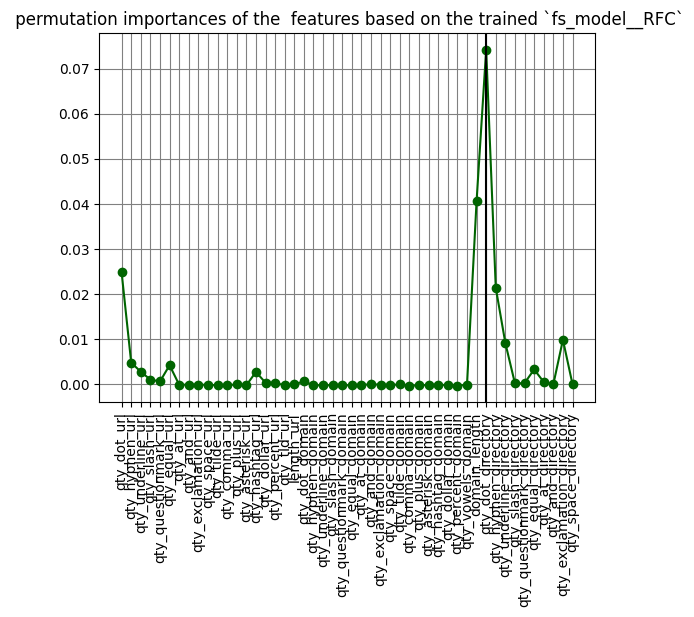

In [41]:
# fs_model__NB_pi = permutation_importance(fs_model__NB,fs_m__x_test,fs_m__y_test,n_repeats=1,random_state=0,scoring='accuracy')
# fs_model__LR_pi = permutation_importance(fs_model__LR,fs_m__x_test,fs_m__y_test,n_repeats=1,random_state=0,scoring='accuracy')
# fs_model__DC_pi = permutation_importance(fs_model__DC,fs_m__x_test,fs_m__y_test,n_repeats=1,random_state=0,scoring='accuracy')
fs_model__RFC_pi = permutation_importance(fs_model__RFC,fs_m__x_test,fs_m__y_test,n_repeats=1,random_state=0,scoring='accuracy')
# fs_model__KNN_pi = permutation_importance(fs_model__KNN,fs_m__x_test,fs_m__y_test,n_repeats=1,random_state=0,scoring='accuracy')
# fs_model__SVM_pi = permutation_importance(fs_model__SVM,fs_m__x_test,fs_m__y_test,n_repeats=1,random_state=0,scoring='accuracy')

# #04 result.importances_mean #05 returns as a row
# #04 result.importances.argsort(axis=0) #05 axis = 0 means row wise (as a series with `n_repeats` column)

dct__fs_model__RFC_pi = {}

op(_HH_)
op("plotting the feature importances of the trained models based on accuracy score :")
op('#' + _HH_ + '#')
op(":: fs_model__RFC_pi :")
op(_H_)
for itr__fs,itr__fs_imp in zip(nfs_m__x_test.columns,fs_model__RFC_pi.importances):
    dct__fs_model__RFC_pi[itr__fs] = [itr__fs_imp[0]]
df = pd.DataFrame(dct__fs_model__RFC_pi).T
df.columns = ['importances']
plt.plot(df,color_hexcodes[6],marker='o')
plt.xticks(rotation=90)
plt.title(' permutation importances of the  features based on the trained `fs_model__RFC`')
plt.axvline(x=38,color = color_hexcodes[2])
op(_HH_)

In [42]:
df__nfs_mtrx_tv = pd.DataFrame({'nfs_model__NB_mtrx':[itr for itr in nfs__model_NB_mtrx_tv],'nfs__model_LR_mtrx':[itr for itr in nfs__model_LR_mtrx_tv],'nfs__model_DC_mtrx':[itr for itr in nfs__model_DC_mtrx_tv],'nfs__model_RFC_mtrx':[itr for itr in nfs__model_RFC_mtrx_tv],'nfs__model_KNN_mtrx':[itr for itr in nfs__model_KNN_mtrx_tv],'nfs__model_SVM_mtrx':[itr for itr in nfs__model_SVM_mtrx_tv]},index=['Confusion Matrix','[`tnr`,`fpr`,`fnr`,`tpr`]','Accuracy Score','Precision Score','Recall Score','F1 Score','ROC AUC Score']).T
df__fs_mtrx_tv = pd.DataFrame({'fs_model__NB_mtrx':[itr for itr in fs__model_NB_mtrx_tv],'fs__model_LR_mtrx':[itr for itr in fs__model_LR_mtrx_tv],'fs__model_DC_mtrx':[itr for itr in fs__model_DC_mtrx_tv],'fs__model_RFC_mtrx':[itr for itr in fs__model_RFC_mtrx_tv],'fs__model_KNN_mtrx':[itr for itr in fs__model_KNN_mtrx_tv],'fs__model_SVM_mtrx':[itr for itr in fs__model_SVM_mtrx_tv]},index=['Confusion Matrix','[`tnr`,`fpr`,`fnr`,`tpr`]','Accuracy Score','Precision Score','Recall Score','F1 Score','ROC AUC Score']).T

df__nfs_mtrx_t = pd.DataFrame({'nfs_model__NB_mtrx':[itr for itr in nfs__model_NB_mtrx_t],'nfs__model_LR_mtrx':[itr for itr in nfs__model_LR_mtrx_t],'nfs__model_DC_mtrx':[itr for itr in nfs__model_DC_mtrx_t],'nfs__model_RFC_mtrx':[itr for itr in nfs__model_RFC_mtrx_t],'nfs__model_KNN_mtrx':[itr for itr in nfs__model_KNN_mtrx_t],'nfs__model_SVM_mtrx':[itr for itr in nfs__model_SVM_mtrx_t]},index=['Confusion Matrix','[`tnr`,`fpr`,`fnr`,`tpr`]','Accuracy Score','Precision Score','Recall Score','F1 Score','ROC AUC Score']).T
df__fs_mtrx_t = pd.DataFrame({'fs_model__NB_mtrx':[itr for itr in fs__model_NB_mtrx_t],'fs__model_LR_mtrx':[itr for itr in fs__model_LR_mtrx_t],'fs__model_DC_mtrx':[itr for itr in fs__model_DC_mtrx_t],'fs__model_RFC_mtrx':[itr for itr in fs__model_RFC_mtrx_t],'fs__model_KNN_mtrx':[itr for itr in fs__model_KNN_mtrx_t],'fs__model_SVM_mtrx':[itr for itr in fs__model_SVM_mtrx_t]},index=['Confusion Matrix','[`tnr`,`fpr`,`fnr`,`tpr`]','Accuracy Score','Precision Score','Recall Score','F1 Score','ROC AUC Score']).T

op(_HH_)
(f'Non-Feature Selection Model Metrics::')
op(f'Train-Validation Metrics:')
df__nfs_mtrx_tv
op(f'Test Metrics:')
df__nfs_mtrx_t
op(_HH_)
op(f'Feature Selection Model Metrics::')
op(f'Train-Validation Metrics:')
df__fs_mtrx_tv
op(f'Test Metrics:')
df__fs_mtrx_t
op(_HH_)

'Non-Feature Selection Model Metrics::'

Train-Validation Metrics:


,Confusion Matrix,"[`tnr`,`fpr`,`fnr`,`tpr`]",Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
nfs_model__NB_mtrx,"[[25114, 3204], [2104, 13182]]","[0.8869, 0.1131, 0.1376, 0.8624]",0.878268,0.804467,0.862358,0.832407,0.874607
nfs__model_LR_mtrx,"[[26712, 1606], [2716, 12570]]","[0.9433, 0.0567, 0.1777, 0.8223]",0.900881,0.88671,0.822321,0.853303,0.882804
nfs__model_DC_mtrx,"[[28318, 0], [2, 15284]]","[1.0, 0.0, 0.0001, 0.9999]",0.999954,1.0,0.999869,0.999935,0.999935
nfs__model_RFC_mtrx,"[[28317, 1], [1, 15285]]","[1.0, 0.0, 0.0001, 0.9999]",0.999954,0.999935,0.999935,0.999935,0.99995
nfs__model_KNN_mtrx,"[[26374, 1944], [2274, 13012]]","[0.9314, 0.0686, 0.1488, 0.8512]",0.903266,0.870019,0.851236,0.860525,0.891294
nfs__model_SVM_mtrx,"[[24097, 4221], [6459, 8827]]","[0.8509, 0.1491, 0.4225, 0.5775]",0.755068,0.676502,0.577456,0.623068,0.7142


Test Metrics:


,Confusion Matrix,"[`tnr`,`fpr`,`fnr`,`tpr`]",Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
nfs_model__NB_mtrx,"[[25109, 3285], [2021, 13190]]","[0.8843, 0.1157, 0.1329, 0.8671]",0.878317,0.800607,0.867136,0.832544,0.875721
nfs__model_LR_mtrx,"[[26755, 1639], [2634, 12577]]","[0.9423, 0.0577, 0.1732, 0.8268]",0.902007,0.884707,0.826836,0.854793,0.884556
nfs__model_DC_mtrx,"[[27235, 1159], [1044, 14167]]","[0.9592, 0.0408, 0.0686, 0.9314]",0.949478,0.924377,0.931365,0.927858,0.945273
nfs__model_RFC_mtrx,"[[27587, 807], [611, 14600]]","[0.9716, 0.0284, 0.0402, 0.9598]",0.967481,0.947621,0.959832,0.953687,0.965705
nfs__model_KNN_mtrx,"[[25564, 2830], [3164, 12047]]","[0.9003, 0.0997, 0.208, 0.792]",0.862539,0.809773,0.791993,0.800784,0.846162
nfs__model_SVM_mtrx,"[[24042, 4352], [6407, 8804]]","[0.8467, 0.1533, 0.4212, 0.5788]",0.753262,0.6692,0.578792,0.620721,0.71276


Feature Selection Model Metrics::
Train-Validation Metrics:


,Confusion Matrix,"[`tnr`,`fpr`,`fnr`,`tpr`]",Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
fs_model__NB_mtrx,"[[22788, 5530], [374, 14912]]","[0.8047, 0.1953, 0.0245, 0.9755]",0.8646,0.729479,0.975533,0.834751,0.890126
fs__model_LR_mtrx,"[[25793, 2525], [1370, 13916]]","[0.9108, 0.0892, 0.0896, 0.9104]",0.910673,0.846421,0.910376,0.877234,0.910605
fs__model_DC_mtrx,"[[28299, 19], [127, 15159]]","[0.9993, 0.0007, 0.0083, 0.9917]",0.996652,0.998748,0.991692,0.995207,0.99551
fs__model_RFC_mtrx,"[[28286, 32], [114, 15172]]","[0.9989, 0.0011, 0.0075, 0.9925]",0.996652,0.997895,0.992542,0.995212,0.995706
fs__model_KNN_mtrx,"[[27006, 1312], [1943, 13343]]","[0.9537, 0.0463, 0.1271, 0.8729]",0.925351,0.910474,0.87289,0.891286,0.91328
fs__model_SVM_mtrx,"[[22448, 5870], [5528, 9758]]","[0.7927, 0.2073, 0.3616, 0.6384]",0.738602,0.624392,0.638362,0.6313,0.715537


Test Metrics:


,Confusion Matrix,"[`tnr`,`fpr`,`fnr`,`tpr`]",Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
fs_model__NB_mtrx,"[[22812, 5582], [381, 14830]]","[0.8034, 0.1966, 0.025, 0.975]",0.86325,0.726533,0.974952,0.832608,0.889181
fs__model_LR_mtrx,"[[25820, 2574], [1350, 13861]]","[0.9093, 0.0907, 0.0888, 0.9112]",0.91001,0.843383,0.911248,0.876003,0.910298
fs__model_DC_mtrx,"[[27223, 1171], [1174, 14037]]","[0.9588, 0.0412, 0.0772, 0.9228]",0.946222,0.923001,0.922819,0.92291,0.940789
fs__model_RFC_mtrx,"[[27375, 1019], [758, 14453]]","[0.9641, 0.0359, 0.0498, 0.9502]",0.959248,0.934139,0.950168,0.942085,0.95714
fs__model_KNN_mtrx,"[[26297, 2097], [2587, 12624]]","[0.9261, 0.0739, 0.1701, 0.8299]",0.892581,0.85755,0.829926,0.843512,0.878036
fs__model_SVM_mtrx,"[[22314, 6080], [5585, 9626]]","[0.7859, 0.2141, 0.3672, 0.6328]",0.732485,0.612887,0.632832,0.622699,0.709351


In [43]:
op(_HH_)
op("displaying the classification report of the trained model(s) for the test data of the selected features :")
op("classification report w.r.t `fs_m__y_test` and `fs_model__NB.predict(fs_m__x_test)` :")
op(classification_report(fs_m__y_test,fs_model__NB_mthds[6]))
op(_H_)
op("classification report w.r.t `fs_m__y_test` and `fs_model__LR.predict(fs_m__x_test)` :")
op(classification_report(fs_m__y_test,fs_model__LR_mthds[6]))
op(_H_)
op("classification report w.r.t `fs_m__y_test` and `fs_model__DC.predict(fs_m__x_test)` :")
op(classification_report(fs_m__y_test,fs_model__DC_mthds[8]))
op(_H_)
op("classification report w.r.t `fs_m__y_test` and `fs_model__RFC.predict(fs_m__x_test)` :")
op(classification_report(fs_m__y_test,fs_model__RFC_mthds[7]))
op(_H_)
op("classification report w.r.t `y_test` and `fs_model__KNN.predict(fs_m__x_test)` :")
op(classification_report(fs_m__y_test,fs_model__KNN_mthds[6]))
op(_H_)
op("classification report w.r.t `y_test` and `fs_model__SVM.predict(fs_m__x_test)` :")
op(classification_report(fs_m__y_test,fs_model__SVM_mthds[3]))
op(_HH_)

displaying the classification report of the trained model(s) for the test data of the selected features :
classification report w.r.t `fs_m__y_test` and `fs_model__NB.predict(fs_m__x_test)` :
              precision    recall  f1-score   support

       False       0.98      0.80      0.88     28394
        True       0.73      0.97      0.83     15211

    accuracy                           0.86     43605
   macro avg       0.86      0.89      0.86     43605
weighted avg       0.89      0.86      0.87     43605

--------------------------------------------------------------------------------
classification report w.r.t `fs_m__y_test` and `fs_model__LR.predict(fs_m__x_test)` :
              precision    recall  f1-score   support

       False       0.95      0.91      0.93     28394
        True       0.84      0.91      0.88     15211

    accuracy                           0.91     43605
   macro avg       0.90      0.91      0.90     43605
weighted avg       0.91      0.91      0.9

displaying the difference between the scores of the models with and without feature selection on the train-validation datasets :


,fs__score_tv,nfs__score_tv,fs_tv-nfs_tv,is `fs_score_tv >= nfs_score_tv`
NB,0.864600,0.878268,-0.013668,False
LR,0.910673,0.900881,0.009793,True
DC,0.996652,0.999954,-0.003302,False
RFC,0.996652,0.999954,-0.003302,False
KNN,0.925351,0.903266,0.022085,True
SVM,0.738602,0.755068,-0.016466,False


--------------------------------------------------------------------------------
displaying the difference between the scores of the models with and without feature selection on the test datasets :


,fs__score_t,nfs__score_t,fs_t-nfs_t,is `fs_score_t >= nfs_score_t`
NB,0.863250,0.878317,-0.015067,False
LR,0.910010,0.902007,0.008004,True
DC,0.946222,0.949478,-0.003257,False
RFC,0.959248,0.967481,-0.008233,False
KNN,0.892581,0.862539,0.030042,True
SVM,0.732485,0.753262,-0.020777,False


displaying the `min` of difference between the scores of the models with and without feature selection on the train-validation datasets :


,fs__score_tv,nfs__score_tv,fs_tv-nfs_tv,is `fs_score_tv >= nfs_score_tv`
SVM,0.738602,0.755068,-0.016466,False


--------------------------------------------------------------------------------
displaying the `max` of difference between the scores of the models with and without feature selection on the train-validation datasets :


,fs__score_tv,nfs__score_tv,fs_tv-nfs_tv,is `fs_score_tv >= nfs_score_tv`
KNN,0.925351,0.903266,0.022085,True


--------------------------------------------------------------------------------
displaying the `min` of difference between the scores of the models with and without feature selection on the test datasets :


,fs__score_t,nfs__score_t,fs_t-nfs_t,is `fs_score_t >= nfs_score_t`
SVM,0.732485,0.753262,-0.020777,False


--------------------------------------------------------------------------------
displaying the `max` of difference between the scores of the models with and without feature selection on the test datasets :


,fs__score_t,nfs__score_t,fs_t-nfs_t,is `fs_score_t >= nfs_score_t`
KNN,0.892581,0.862539,0.030042,True


plotting the scores of the models with and without feature selection on the train-validation datasets and test datasets ::
#--------------------------------------------------------------------------------#


Text(NB, 0.8782680488028621, '0.8783')

Text(LR, 0.900880653151087, '0.9009')

Text(DC, 0.9999541326483808, '1.0')

Text(RFC, 0.9999541326483808, '1.0')

Text(KNN, 0.9032657554352812, '0.9033')

Text(SVM, 0.7550683423539125, '0.7551')

Text(NB, 0.8783167067996789, '0.8783')

Text(LR, 0.9020066506134617, '0.902')

Text(DC, 0.9494782708405, '0.9495')

Text(RFC, 0.9674807934869855, '0.9675')

Text(KNN, 0.8625386996904024, '0.8625')

Text(SVM, 0.7532622405687421, '0.7533')

Text(NB, 0.8645995780203651, '0.8646')

Text(LR, 0.9106733327217686, '0.9107')

Text(DC, 0.9966516833318044, '0.9967')

Text(RFC, 0.9966516833318044, '0.9967')

Text(KNN, 0.9253508852398863, '0.9254')

Text(SVM, 0.7386019631226493, '0.7386')

Text(NB, 0.8632496273363146, '0.8632')

Text(LR, 0.9100103199174406, '0.91')

Text(DC, 0.9462217635592248, '0.9462')

Text(RFC, 0.9592477926843251, '0.9592')

Text(KNN, 0.8925811260176585, '0.8926')

Text(SVM, 0.7324848067882124, '0.7325')

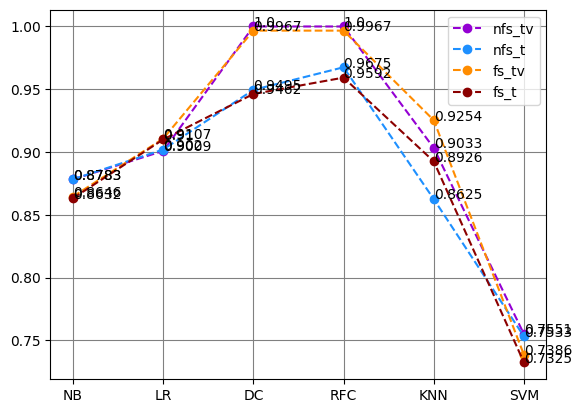

In [44]:
df__fs_tv = pd.DataFrame([fs_model__NB_mthds[5],fs_model__LR_mthds[5],fs_model__DC_mthds[7],fs_model__RFC_mthds[6],fs_model__KNN_mthds[5],fs_model__SVM_mthds[2]],columns=['score_tv'],index=['NB','LR','DC','RFC','KNN','SVM'])
df__nfs_tv = pd.DataFrame([nfs_model__NB_mthds[5],nfs_model__LR_mthds[5],nfs_model__DC_mthds[7],nfs_model__RFC_mthds[6],nfs_model__KNN_mthds[5],nfs_model__SVM_mthds[2]],columns=['score_tv'],index=['NB','LR','DC','RFC','KNN','SVM'])
df__fsnfs_tv = pd.concat([df__fs_tv,df__nfs_tv],axis=1)
df__fsnfs_tv.columns = ['fs__score_tv','nfs__score_tv']
df__fsnfs_tv['fs_tv-nfs_tv'] = df__fsnfs_tv['fs__score_tv'] - df__fsnfs_tv['nfs__score_tv']
df__fsnfs_tv['is `fs_score_tv >= nfs_score_tv`'] = df__fsnfs_tv['fs__score_tv'] >= df__fsnfs_tv['nfs__score_tv']

df__fs_t = pd.DataFrame([fs_model__NB_mthds[10],fs_model__LR_mthds[10],fs_model__DC_mthds[14],fs_model__RFC_mthds[12],fs_model__KNN_mthds[10],fs_model__SVM_mthds[4]],columns=['score_t'],index=['NB','LR','DC','RFC','KNN','SVM'])
df__nfs_t = pd.DataFrame([nfs_model__NB_mthds[10],nfs_model__LR_mthds[10],nfs_model__DC_mthds[14],nfs_model__RFC_mthds[12],nfs_model__KNN_mthds[10],nfs_model__SVM_mthds[4]],columns=['score_t'],index=['NB','LR','DC','RFC','KNN','SVM'])
df__fsnfs_t = pd.concat([df__fs_t,df__nfs_t],axis=1)
df__fsnfs_t.columns = ['fs__score_t','nfs__score_t']
df__fsnfs_t['fs_t-nfs_t'] = df__fsnfs_t['fs__score_t'] - df__fsnfs_t['nfs__score_t']
df__fsnfs_t['is `fs_score_t >= nfs_score_t`'] = df__fsnfs_t['fs__score_t'] >= df__fsnfs_t['nfs__score_t']

op(_HH_)
op("displaying the difference between the scores of the models with and without feature selection on the train-validation datasets :")
df__fsnfs_tv
op(_H_)
op("displaying the difference between the scores of the models with and without feature selection on the test datasets :")
df__fsnfs_t
op(_HH_)
op("displaying the `min` of difference between the scores of the models with and without feature selection on the train-validation datasets :")
df__fsnfs_tv[df__fsnfs_tv['fs_tv-nfs_tv'] == df__fsnfs_tv['fs_tv-nfs_tv'].min()]
op(_H_)
op("displaying the `max` of difference between the scores of the models with and without feature selection on the train-validation datasets :")
df__fsnfs_tv[df__fsnfs_tv['fs_tv-nfs_tv'] == df__fsnfs_tv['fs_tv-nfs_tv'].max()]
op(_H_)
op("displaying the `min` of difference between the scores of the models with and without feature selection on the test datasets :")
df__fsnfs_t[df__fsnfs_t['fs_t-nfs_t'] == df__fsnfs_t['fs_t-nfs_t'].min()]
op(_H_)
op("displaying the `max` of difference between the scores of the models with and without feature selection on the test datasets :")
df__fsnfs_t[df__fsnfs_t['fs_t-nfs_t'] == df__fsnfs_t['fs_t-nfs_t'].max()]
op(_HH_)
op("plotting the scores of the models with and without feature selection on the train-validation datasets and test datasets ::")
op("#" + _H_ + "#")
plt.plot(df__nfs_tv.index,df__nfs_tv['score_tv'],color_hexcodes[3],label='nfs_tv',marker='o',linestyle='--')
for x,y in zip(df__nfs_tv.index,df__nfs_tv['score_tv'].values.tolist()):
    plt.text(x,y,str(round(y,4)))
plt.plot(df__nfs_t.index,df__nfs_t['score_t'],color_hexcodes[4],label='nfs_t',marker='o',linestyle='--')
for x,y in zip(df__nfs_t.index,df__nfs_t['score_t'].values.tolist()):
    plt.text(x,y,str(round(y,4)))
plt.plot(df__fs_tv.index,df__fs_tv['score_tv'],color_hexcodes[8],label='fs_tv',marker='o',linestyle='--')
for x,y in zip(df__fs_tv.index,df__fs_tv['score_tv'].values.tolist()):
    plt.text(x,y,str(round(y,4)))
plt.plot(df__fs_t.index,df__fs_t['score_t'],color_hexcodes[9],label='fs_t',marker='o',linestyle='--')
for x,y in zip(df__fs_t.index,df__fs_t['score_t'].values.tolist()):
    plt.text(x,y,str(round(y,4)))
plt.legend()
plt.show()
op(_HH_)

displaying the `max` of score of `roc_auc_score` of the models with feature selection on the test datasets :


,Confusion Matrix,"[`tnr`,`fpr`,`fnr`,`tpr`]",Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
fs__model_RFC_mtrx,"[[27375, 1019], [758, 14453]]","[0.9641, 0.0359, 0.0498, 0.9502]",0.959248,0.934139,0.950168,0.942085,0.95714


plotting the `roc_auc_score` of the models with feature selection on the test datasets :
#--------------------------------------------------------------------------------#


#--------------------------------------------------------------------------------#


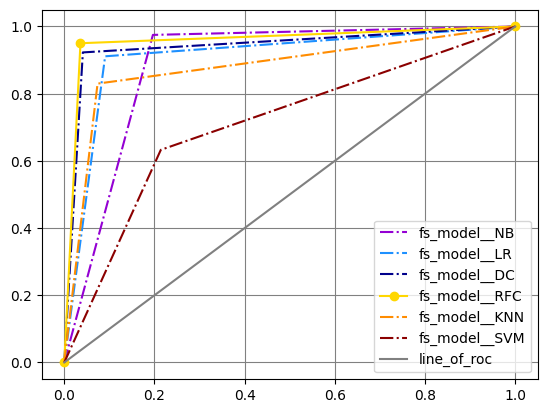

In [45]:
op(_HH_)
op("displaying the `max` of score of `roc_auc_score` of the models with feature selection on the test datasets :")
df__fs_mtrx_t[df__fs_mtrx_t['ROC AUC Score'] == df__fs_mtrx_t['ROC AUC Score'].max()]
op(_HH_)
op("plotting the `roc_auc_score` of the models with feature selection on the test datasets :")
op("#" + _H_ + "#")
mNB__fpr,mNB__tpr,mNB__thresholds = roc_curve(fs_m__y_test,fs_model__NB_mthds[6])
plt.plot(mNB__fpr,mNB__tpr,color_hexcodes[3],label='fs_model__NB',linestyle='dashdot')
# plt.plot([0,1],[0,1],'k--')
# plt.show()

mLR__fpr,mLR__tpr,mLR__thresholds = roc_curve(fs_m__y_test,fs_model__LR_mthds[6])
plt.plot(mLR__fpr,mLR__tpr,color_hexcodes[4],label='fs_model__LR',linestyle='dashdot')
# plt.plot([0,1],[0,1],'k--')
# plt.show()

mDC__fpr,mDC__tpr,mDC__thresholds = roc_curve(fs_m__y_test,fs_model__DC_mthds[8])
plt.plot(mDC__fpr,mDC__tpr,color_hexcodes[5],label='fs_model__DC',linestyle='dashdot')
# plt.plot([0,1],[0,1],'k--')
# plt.show()

mRFC__fpr,mRFC__tpr,mRFC__thresholds = roc_curve(fs_m__y_test,fs_model__RFC_mthds[7])
plt.plot(mRFC__fpr,mRFC__tpr,color_hexcodes[7],label='fs_model__RFC',marker='o',linestyle='solid')
# plt.plot([0,1],[0,1],'k--')
# plt.show()

mKNN__fpr,mKNN__tpr,mKNN__thresholds = roc_curve(fs_m__y_test,fs_model__KNN_mthds[6])
plt.plot(mKNN__fpr,mKNN__tpr,color_hexcodes[8],label='fs_model__KNN',linestyle='dashdot')
# plt.plot([0,1],[0,1],'k--')
# plt.show()

mSVM__fpr,mSVM__tpr,mSVM__thresholds = roc_curve(fs_m__y_test,fs_model__SVM_mthds[3])
plt.plot(mSVM__fpr,mSVM__tpr,color_hexcodes[9],label='fs_model__SVM',linestyle='dashdot')
# plt.plot([0,1],[0,1],'k--')
# plt.show()
op("#" + _H_ + "#")
plt.plot([0,1],[0,1],color_hexcodes[1],label='line_of_roc')
plt.legend()
plt.show()
op(_HH_)

##### :: conclusion(s) :

> On the basis of the above plots, we can conclude that there is a very slight variation in the accuracy of the model when trained with and without feature selection. So, we can consider the selected features for training the model.

> With the comparison of the training and testing accuracy, we can conclude that the model is not overfitting.

> Since the model `RFC` with feature selection has the highest accuracy and highest `ROC_AUC` score, we can consider it as the best model.

##### :: model visualization :

plotting a partial with `max-depth=3` 'DecisionTree' of index `10` from a random list of 'DecisionTrees' of the `fs_model__RFC` trained model :
#--------------------------------------------------------------------------------#


<Figure size 2800x600 with 0 Axes>

[Text(0.38095238095238093, 0.9, 'qty_dot_file <= -0.5\ngini = 0.456\nsamples = 27532\nvalue = [28289, 15315]'),
 Text(0.14285714285714285, 0.7, 'domain_google_index <= 0.5\ngini = 0.029\nsamples = 14550\nvalue = [22755, 345]'),
 Text(0.09523809523809523, 0.5, 'tld_present_params <= 0.5\ngini = 0.03\nsamples = 14464\nvalue = [22612, 345]'),
 Text(0.047619047619047616, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.14285714285714285, 0.3, 'time_domain_activation <= 589.0\ngini = 0.029\nsamples = 14463\nvalue = [22612, 343]'),
 Text(0.09523809523809523, 0.1, '\n  (...)  \n'),
 Text(0.19047619047619047, 0.1, '\n  (...)  \n'),
 Text(0.19047619047619047, 0.5, 'gini = 0.0\nsamples = 86\nvalue = [143, 0]'),
 Text(0.6190476190476191, 0.7, 'domain_spf <= 0.5\ngini = 0.394\nsamples = 12982\nvalue = [5534, 14970]'),
 Text(0.42857142857142855, 0.5, 'qty_slash_url <= 2.5\ngini = 0.442\nsamples = 7981\nvalue = [4170, 8504]'),
 Text(0.3333333333333333, 0.3, 'qty_hyphen_directory <= 0.5\ngini

Text(0.5, 1.0, "plotting a partial with `max-depth=3` 'DecisionTree' of index `10` from a random list of 'DecisionTrees' of the `fs_model__RFC` trained model")

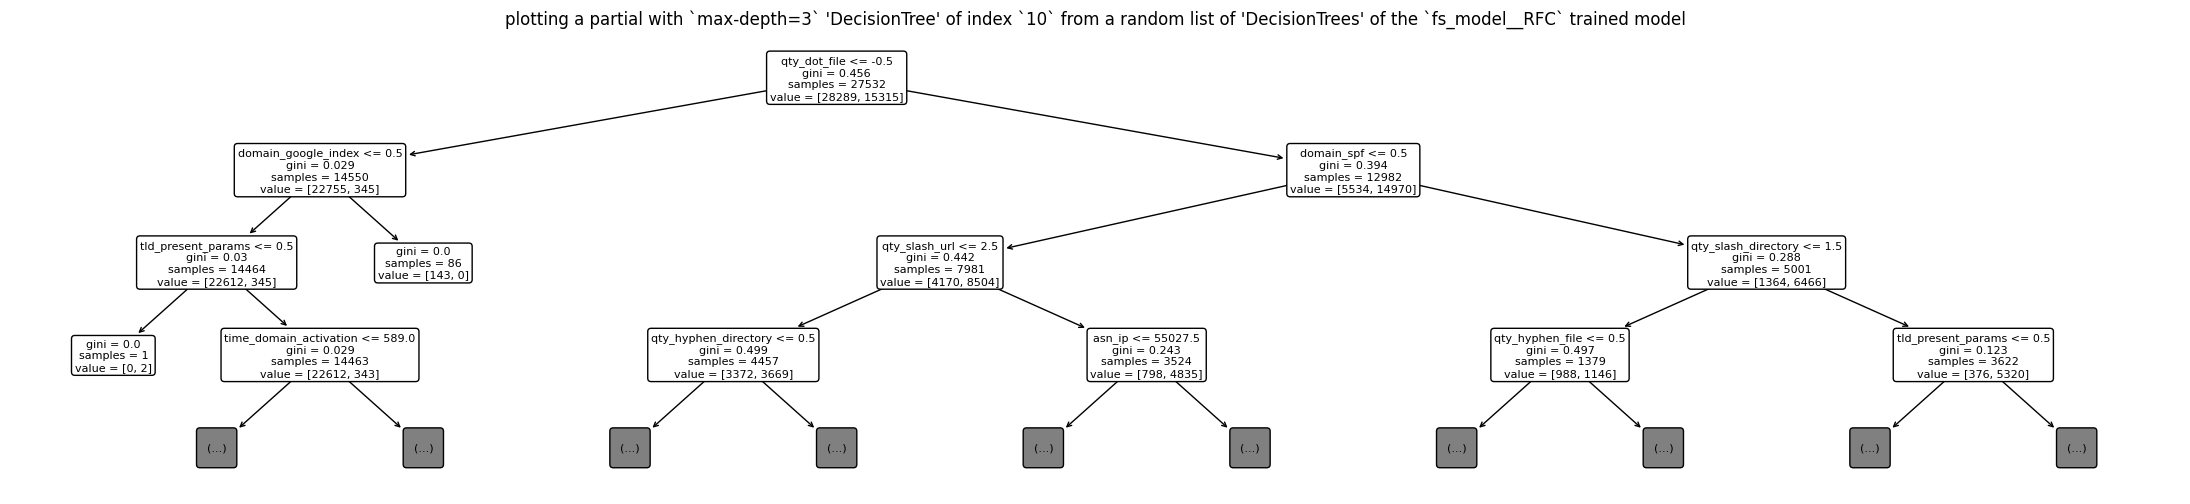

In [46]:
####### model visualization of the best model i.e. `RFC` with feature selection :

rand__n_rfc_tree = np.random.randint(0,len(fs_model__RFC_attrs[1]))
op(_HH_)
op(f"plotting a partial with `max-depth=3` 'DecisionTree' of index `{rand__n_rfc_tree}` from a random list of 'DecisionTrees' of the `fs_model__RFC` trained model :")
op('#' + _H_ + '#')
plt.figure(figsize=(28,6))
plot_tree(fs_model__RFC_attrs[1][rand__n_rfc_tree],max_depth = 3,rounded=True,feature_names=fs_m__x_test.columns,filled=False,fontsize=8)
plt.title(f"plotting a partial with `max-depth=3` 'DecisionTree' of index `{rand__n_rfc_tree}` from a random list of 'DecisionTrees' of the `fs_model__RFC` trained model")
# plt.show()
op(_HH_)

---

#### deploying the evoluted model(s) :

In [47]:
with open('../Model/fs_model__NB.pkl','wb') as f:
    pkl.dump(fs_model__NB,f)
with open('../Model/fs_model__LR.pkl','wb') as f:
    pkl.dump(fs_model__LR,f)
with open('../Model/fs_model__DC.pkl','wb') as f:
    pkl.dump(fs_model__DC,f)
with open('../Model/fs_model__RFC.pkl','wb') as f:
    pkl.dump(fs_model__RFC,f)
with open('../Model/fs_model__KNN.pkl','wb') as f:
    pkl.dump(fs_model__KNN,f)
with open('../Model/fs_model__SVM.pkl','wb') as f:
    pkl.dump(fs_model__SVM,f)

op(_HH_)
op("log :: models w.r.t feature selection have been successfully saved at `../Model/.. *.pkl` directory")
op(_HH_)

log :: models w.r.t feature selection have been successfully saved at `../Model/.. *.pkl` directory


---

#### appendices :

##### :: color codes :

| Color Name | Light Shade Hex Code | Light Shade Color Name | Dark Shade Hex Code | Dark Shade Color Name |
|------------|----------------------|------------------------|---------------------|-----------------------|
| Black      | #000000              | Black                  | #000000             | Black                 |
| Gray       | #C0C0C0              | Silver                 | #808080             | Gray                  |
| White      | #FFFFFF              | White                  | #FFFFFF             | White                 |
| Violet     | #EE82EE              | Lavender/Violet        | #9400D3             | Dark Violet           |
| Indigo     | #6D5ACF              | Light Indigo           | #1E90FF             | Dodger Blue           |
| Blue       | #0000CD              | Medium Blue            | #00008B             | Dark Blue             |
| Green      | #00FF00              | Lime                   | #006400             | Dark Green            |
| Yellow     | #FFFF33              | Neon Yellow            | #FFD700             | Gold                  |
| Orange     | #FFA600              | Cheese Orange          | #FF8C00             | Dark Orange           |
| Red        | #FF0000              | Light Red/Red          | #8B0000             | Dark Red              |

---

#### Source(s) and Reference(s) :

Phishing Dataset - Mendeley Data : https://data.mendeley.com/datasets/72ptz43s9v/1
<br>
Phishing URL Detection Using Machine Learning Techniques (for Data Dictionary and Data Description) : https://www.sciencedirect.com/science/article/pii/S2352340920313202

---
---